In [1]:
# General
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

In [2]:
# Preprocessing / Feature engineering
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [3]:
# Model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

In [4]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [5]:
# Evaluation metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score, precision_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import precision_score, recall_score

In [6]:
# Feature selection
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
# Special packages to plot trees
import graphviz 
import pydotplus
import pylab
import colour
from dtreeviz import trees
from dtreeviz.trees import *

In [8]:
# Models

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import _tree

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier

# XGBoost
import xgboost as xgb

# SVM
from sklearn.svm import SVC

# Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import the database

In [9]:
# Here I can just load the respective preprocessed dataset/file from the folder, 
# since I have done the preprocessing already in another script

df = pd.read_csv("D:/Allaus/Code/train/2_both_based_on_ptz/DataBase_IDW_preprocessed.csv")
df

,Elevation,Slope,CurvaturePlan,CurvatureProf,OrientationToNorth,Forest,Rocks,Screes,SnowCover,CriticalRecharge,...,Aspect_West,Wind_East,Wind_North,Wind_North-East,Wind_North-West,Wind_South,Wind_South-East,Wind_South-West,Wind_West,Avalanche
0,1511,56,-1.15,1.27,0,0,1,0,0.000,21.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,1789,48,0.66,-0.15,1,1,0,0,0.000,2680.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,1613,73,-3.43,17.57,0,0,1,0,0.000,266.300000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,1552,62,-1.19,0.59,0,1,1,0,0.000,70.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,1371,70,0.46,0.35,0,1,0,0,0.000,78.900000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2392,21,-0.22,0.10,1,0,0,0,0.592,2633.034951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2296,2266,31,-0.30,-0.38,1,1,0,0,0.478,872.143383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2297,1705,45,0.60,-0.38,0,1,0,0,0.000,4331.832356,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2298,2377,32,0.00,-0.01,0,0,0,0,0.621,3319.897190,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [10]:
df.columns

Index(['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf',
       'OrientationToNorth', 'Forest', 'Rocks', 'Screes', 'SnowCover',
       'CriticalRecharge', 'Rain', 'Rain2D', 'Rain3D', 'ExtremeRain',
       'MonthlyRain', 'Tmin', 'Tmax', 'Tmean', 'Trange', 'SnowTotal',
       'Snow24h', 'Snow48h', 'Snow72h', 'MonthlySnow', 'WindSpeedMean',
       'WindSpeedMax', 'PotentialSnowTransport', 'Aspect_East', 'Aspect_North',
       'Aspect_North-East', 'Aspect_North-West', 'Aspect_South',
       'Aspect_South-East', 'Aspect_South-West', 'Aspect_West', 'Wind_East',
       'Wind_North', 'Wind_North-East', 'Wind_North-West', 'Wind_South',
       'Wind_South-East', 'Wind_South-West', 'Wind_West', 'Avalanche'],
      dtype='object')

In [11]:
len(df.columns)

44

In [ ]:
for col in df.iloc[:,:]:
    plt.hist(df[df['Avalanche'] == 1][col], color='red', label='Susceptible', alpha=0.7, density=True) # density normalizes these distributions
    plt.hist(df[df['Avalanche'] == 0][col], color='blue', label='Not susceptible', alpha=0.7, density=True)
    plt.title(col)
    plt.ylabel('Probability')
    plt.xlabel(col)
    plt.legend()
    plt.show();
    

In [ ]:
# # Alternative plotting
# sns.pairplot(df_encoded, hue='Allaus', diag_kind='hist')
# #plt.savefig('D:/Allaus/Data_analysis/ML/pairplot_ptz.png', dpi=300)
# plt.show();

# Split between dependent and independent / target (variables)

In [10]:
# Including the Area as a predictor is wrong, because I manipulated it when I was creating the non-allaus data, 
# it didn't come from the raw data

X = df.drop(['Avalanche'], axis=1).copy()   
X.head()

,Elevation,Slope,CurvaturePlan,CurvatureProf,OrientationToNorth,Forest,Rocks,Screes,SnowCover,CriticalRecharge,...,Aspect_South-West,Aspect_West,Wind_East,Wind_North,Wind_North-East,Wind_North-West,Wind_South,Wind_South-East,Wind_South-West,Wind_West
0,1511,56,-1.15,1.27,0,0,1,0,0.0,21.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1789,48,0.66,-0.15,1,1,0,0,0.0,2680.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1613,73,-3.43,17.57,0,0,1,0,0.0,266.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1552,62,-1.19,0.59,0,1,1,0,0.0,70.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1371,70,0.46,0.35,0,1,0,0,0.0,78.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
X.tail()

,Elevation,Slope,CurvaturePlan,CurvatureProf,OrientationToNorth,Forest,Rocks,Screes,SnowCover,CriticalRecharge,...,Aspect_South-West,Aspect_West,Wind_East,Wind_North,Wind_North-East,Wind_North-West,Wind_South,Wind_South-East,Wind_South-West,Wind_West
2295,2392,21,-0.22,0.10,1,0,0,0,0.592,2633.034951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2296,2266,31,-0.30,-0.38,1,1,0,0,0.478,872.143383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2297,1705,45,0.60,-0.38,0,1,0,0,0.000,4331.832356,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2298,2377,32,0.00,-0.01,0,0,0,0,0.621,3319.897190,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2299,2408,27,-0.12,0.15,0,0,0,0,0.642,2358.448260,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
y = df['Avalanche'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Avalanche, dtype: int64

In [13]:
X.shape, y.shape

((2300, 43), (2300,))

In [14]:
X.dtypes

Elevation                   int64
Slope                       int64
CurvaturePlan             float64
CurvatureProf             float64
OrientationToNorth          int64
Forest                      int64
Rocks                       int64
Screes                      int64
SnowCover                 float64
CriticalRecharge          float64
Rain                      float64
Rain2D                    float64
Rain3D                    float64
ExtremeRain               float64
MonthlyRain               float64
Tmin                      float64
Tmax                      float64
Tmean                     float64
Trange                    float64
SnowTotal                 float64
Snow24h                   float64
Snow48h                   float64
Snow72h                   float64
MonthlySnow               float64
WindSpeedMean             float64
WindSpeedMax              float64
PotentialSnowTransport    float64
Aspect_East               float64
Aspect_North              float64
Aspect_North-E

In [15]:
y.unique()

array([1, 0], dtype=int64)

In [16]:
X = X.drop(columns=['OrientationToNorth', 'PotentialSnowTransport', 'Aspect_East', 'Aspect_North',
       'Aspect_North-East', 'Aspect_North-West',
       'Aspect_South-East', 'Aspect_South-West', 'Aspect_West', 'Wind_East',
       'Wind_North', 'Wind_North-East', 'Wind_North-West',
       'Wind_South-East', 'Wind_South-West', 'Wind_West', 'Aspect_South'])
X

,Elevation,Slope,CurvaturePlan,CurvatureProf,Forest,Rocks,Screes,SnowCover,CriticalRecharge,Rain,...,Tmean,Trange,SnowTotal,Snow24h,Snow48h,Snow72h,MonthlySnow,WindSpeedMean,WindSpeedMax,Wind_South
0,1511,56,-1.15,1.27,0,1,0,0.000,21.000000,1.700000,...,4.4,9.4,52.9,2.3,4.4,6.4,51.9,5.6,13.0,0.0
1,1789,48,0.66,-0.15,1,0,0,0.000,2680.500000,1.700000,...,4.5,9.4,51.7,2.3,4.4,6.4,51.7,5.6,14.1,0.0
2,1613,73,-3.43,17.57,0,1,0,0.000,266.300000,1.700000,...,5.2,9.8,49.1,2.2,4.3,6.3,51.1,5.7,13.1,0.0
3,1552,62,-1.19,0.59,1,1,0,0.000,70.200000,1.700000,...,5.3,9.9,48.3,2.2,4.3,6.2,50.9,5.7,13.0,0.0
4,1371,70,0.46,0.35,1,0,0,0.000,78.900000,1.600000,...,5.5,10.0,47.4,2.2,4.2,6.2,50.7,5.7,12.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2392,21,-0.22,0.10,0,0,0,0.592,2633.034951,1.973622,...,-0.1,8.1,67.8,2.4,4.5,6.4,44.5,8.0,31.6,0.0
2296,2266,31,-0.30,-0.38,1,0,0,0.478,872.143383,1.828799,...,-1.0,7.8,68.9,2.4,4.5,6.5,46.7,7.9,32.0,0.0
2297,1705,45,0.60,-0.38,1,0,0,0.000,4331.832356,2.156980,...,1.9,9.9,84.2,2.9,5.4,7.9,70.1,5.7,19.4,0.0
2298,2377,32,0.00,-0.01,0,0,0,0.621,3319.897190,1.702185,...,-0.9,8.1,71.7,2.5,4.8,7.0,56.7,6.0,25.9,1.0


# Shuffle the data

Shuffling may be bad for reproducibility, but it is good for reliability

In [ ]:
# df = df.sample(frac = 1)  # here, I do it together with the train, valid, test split

# Train, validation and test split altogether from one dataset

In [17]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [18]:
train.head()

,Elevation,Slope,CurvaturePlan,CurvatureProf,OrientationToNorth,Forest,Rocks,Screes,SnowCover,CriticalRecharge,...,Aspect_West,Wind_East,Wind_North,Wind_North-East,Wind_North-West,Wind_South,Wind_South-East,Wind_South-West,Wind_West,Avalanche
482,2757,58,-0.14,-0.29,0,0,1,1,0.488,899.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1257,1920,38,-0.02,-0.17,0,1,0,0,0.441,1664.424122,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
205,2439,41,0.08,-0.49,0,0,0,1,0.606,1874.400000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2297,1705,45,0.60,-0.38,0,1,0,0,0.000,4331.832356,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
557,2101,51,0.31,-0.04,0,1,0,0,0.000,672.400000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [19]:
train.columns

Index(['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf',
       'OrientationToNorth', 'Forest', 'Rocks', 'Screes', 'SnowCover',
       'CriticalRecharge', 'Rain', 'Rain2D', 'Rain3D', 'ExtremeRain',
       'MonthlyRain', 'Tmin', 'Tmax', 'Tmean', 'Trange', 'SnowTotal',
       'Snow24h', 'Snow48h', 'Snow72h', 'MonthlySnow', 'WindSpeedMean',
       'WindSpeedMax', 'PotentialSnowTransport', 'Aspect_East', 'Aspect_North',
       'Aspect_North-East', 'Aspect_North-West', 'Aspect_South',
       'Aspect_South-East', 'Aspect_South-West', 'Aspect_West', 'Wind_East',
       'Wind_North', 'Wind_North-East', 'Wind_North-West', 'Wind_South',
       'Wind_South-East', 'Wind_South-West', 'Wind_West', 'Avalanche'],
      dtype='object')

In [20]:
valid.head()

,Elevation,Slope,CurvaturePlan,CurvatureProf,OrientationToNorth,Forest,Rocks,Screes,SnowCover,CriticalRecharge,...,Aspect_West,Wind_East,Wind_North,Wind_North-East,Wind_North-West,Wind_South,Wind_South-East,Wind_South-West,Wind_West,Avalanche
115,2358,42,-0.01,-0.32,0,0,0,0,0.644,2238.300000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
938,2716,76,0.70,-0.61,0,0,1,0,0.616,1624.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1464,2517,45,-0.08,0.25,0,0,0,1,0.566,1764.749327,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1362,2457,28,-0.17,-0.13,1,0,0,0,0.585,2998.836982,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
94,2258,54,0.00,0.25,1,1,0,1,0.522,1161.200000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [21]:
test.head()

,Elevation,Slope,CurvaturePlan,CurvatureProf,OrientationToNorth,Forest,Rocks,Screes,SnowCover,CriticalRecharge,...,Aspect_West,Wind_East,Wind_North,Wind_North-East,Wind_North-West,Wind_South,Wind_South-East,Wind_South-West,Wind_West,Avalanche
163,2249,35,-0.11,-0.17,1,1,0,1,0.000,1503.500000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
417,2708,67,0.11,-0.38,0,0,1,1,0.552,869.800000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1801,1465,39,0.20,0.25,1,1,0,0,0.000,1001.013182,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1937,1533,45,0.61,-0.06,0,0,0,0,0.000,764.524956,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2267,2535,65,-0.67,-2.17,0,0,1,1,0.000,20.094619,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [22]:
X_train = train.drop(['Avalanche'], axis=1).copy()
y_train = train['Avalanche'].copy()

In [23]:
X_valid = valid.drop(['Avalanche'], axis=1).copy()
y_valid = valid['Avalanche'].copy()

In [24]:
X_test = test.drop(['Avalanche'], axis=1).copy()
y_test = test['Avalanche'].copy()

In [25]:
X_train.shape, y_train.shape

((1380, 43), (1380,))

In [26]:
X_valid.shape, y_valid.shape

((460, 43), (460,))

In [27]:
X_test.shape, y_test.shape

((460, 43), (460,))

In [28]:
y_train.unique(), y_valid.unique(), y_test.unique()

(array([1, 0], dtype=int64),
 array([1, 0], dtype=int64),
 array([1, 0], dtype=int64))

In [ ]:
# Check to make sure the classes are more or less balanced

plt.hist(y_train)
plt.ylabel("Count of output labels")
plt.show()

plt.hist(y_valid)
plt.ylabel("Count of output labels")
plt.show()

plt.hist(y_test)
plt.ylabel("Count of output labels")
plt.show()

# Feature selection

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1380 entries, 482 to 1827
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Elevation               1380 non-null   int64  
 1   Slope                   1380 non-null   int64  
 2   CurvaturePlan           1380 non-null   float64
 3   CurvatureProf           1380 non-null   float64
 4   OrientationToNorth      1380 non-null   int64  
 5   Forest                  1380 non-null   int64  
 6   Rocks                   1380 non-null   int64  
 7   Screes                  1380 non-null   int64  
 8   SnowCover               1380 non-null   float64
 9   CriticalRecharge        1380 non-null   float64
 10  Rain                    1380 non-null   float64
 11  Rain2D                  1380 non-null   float64
 12  Rain3D                  1380 non-null   float64
 13  ExtremeRain             1380 non-null   float64
 14  MonthlyRain             1380 non-null 

In [ ]:
X_train.describe().T

**Variance Threshold**

In this case it is not an issue

I don't have features with constant values

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_train)

In [ ]:
var_thres.get_support()    # If all are true, then none of the variables is constant

**Chi-2 Test**

!!! Only for categorical (non-negative) variables !!!

It returns two values: F-score & p-value

The higher the F-score, the more important the feature is

The smallest the p-value, the more important the feature (?)

In [ ]:
X_train.columns

In [ ]:
len(X_train.columns)

In [ ]:
# Select only the categorical variables

X_chi2 = X_train[['OrientationToNorth', 'Forest', 'Rocks', 'Screes', 
                  'PotentialSnowTransport', 'Aspect_East', 'Aspect_North',
                   'Aspect_North-East', 'Aspect_North-West', 'Aspect_South',
                   'Aspect_South-East', 'Aspect_South-West', 'Aspect_West', 'Wind_East',
                   'Wind_North', 'Wind_North-East', 'Wind_North-West', 'Wind_South',
                   'Wind_South-East', 'Wind_South-West', 'Wind_West']]
len(X_chi2.columns)

In [ ]:
y_chi2 = y_train.copy()
y_chi2

In [ ]:
y_chi2.unique()

In [ ]:
from sklearn.feature_selection import chi2
f_p_values = chi2(X_chi2, y_chi2)
f_p_values

In [ ]:
p_values = pd.Series(f_p_values[1])
p_values.index = X_chi2.columns
p_values

In [ ]:
p_values.sort_values(ascending=True)

**Get rid of categorical values that are not important**

Based on the Chi2 test

I remove every variable with p-value < 0.05

Alternative: use the SelectKBest object or the nlargest() function

In [1]:
# # I can use this in order to select the features that I want after every test
# # nlargest() is also an option if I have the scores or the p-values
# from sklearn.feature_selection import SelectKBest

# sel_feat = SelectKBest(chi2, k = 8)
# sel_feat.fit(X_chi2, y_chi2)
# X_chi2.columns[sel_feat.get_support()]

**At first, mostly based on the histograms, remove the least important categorical features**

In [ ]:
X_train.columns

In [ ]:
X_train = X_train.drop(columns=['OrientationToNorth', 'PotentialSnowTransport', 'Aspect_East', 'Aspect_North',
       'Aspect_North-East', 'Aspect_North-West',
       'Aspect_South-East', 'Aspect_South-West', 'Aspect_West', 'Wind_East',
       'Wind_North', 'Wind_North-East', 'Wind_North-West',
       'Wind_South-East', 'Wind_South-West', 'Wind_West'])
X_train


In [ ]:
X_train.columns

In [ ]:
y_train.unique()

In [ ]:
y_train.shape

**Do the same for the validation and test set**

In [ ]:
X_valid

In [ ]:
X_valid = X_valid.drop(columns=['OrientationToNorth', 'PotentialSnowTransport', 'Aspect_East', 'Aspect_North',
       'Aspect_North-East', 'Aspect_North-West',
       'Aspect_South-East', 'Aspect_South-West', 'Aspect_West', 'Wind_East',
       'Wind_North', 'Wind_North-East', 'Wind_North-West',
       'Wind_South-East', 'Wind_South-West', 'Wind_West'])
X_valid


In [ ]:
y_valid.unique()

In [ ]:
y_valid.shape

In [ ]:
X_test = X_test.drop(columns=['OrientationToNorth', 'PotentialSnowTransport', 'Aspect_East', 'Aspect_North',
       'Aspect_North-East', 'Aspect_North-West',
       'Aspect_South-East', 'Aspect_South-West', 'Aspect_West', 'Wind_East',
       'Wind_North', 'Wind_North-East', 'Wind_North-West',
       'Wind_South-East', 'Wind_South-West', 'Wind_West'])
X_test


In [ ]:
y_test.shape

**Pearson's Correlation**

In [ ]:
# Plot color scaled correlation matrix

corr=X_train.corr()
corr.style.background_gradient(cmap='coolwarm')       

In [ ]:
X_train.ExtremeRain.corr(X_train.MonthlyRain)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(X_train.corr())
plt.title("Feature correlation heatmap", y=1.04)
plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/correlation - independent variables.png', dpi=300)
plt.show();

In [ ]:
df.SnowTotal.corr(df.Tmax)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold:   # I want to keep the negative correlations
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

In [ ]:
corr_features

**Mutual Information**

Mutual information is sometimes used as a synonym for information gain. 
Technically, they calculate the same quantity if applied to the same data.

In [34]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([ 0.15753218,  0.13186027,  0.00595621,  0.01219973,  0.00203958,
        0.01831375,  0.07389054,  0.06441503,  0.07492683,  0.08548556,
        0.59197087,  0.55402641,  0.03152889,  0.02231716,  0.03637086,
        0.03940148,  0.07799693,  0.057415  ,  0.01943804,  0.07016364,
        0.03975666,  0.04637467,  0.05353281,  0.02974767,  0.03806118,
        0.06642921,  0.        ,  0.01316226,  0.02846115,  0.        ,
        0.        ,  0.00627397,  0.        ,  0.        ,  0.        ,
        0.04498577,  0.02867052,  0.01276341,  0.00521622,  0.04230218,
        0.        ,  0.        ,  0.        ])

In [35]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

Rain                      0.591971
Rain2D                    0.554026
Elevation                 0.157532
Slope                     0.131860
CriticalRecharge          0.085486
Tmax                      0.077997
SnowCover                 0.074927
Rocks                     0.073891
SnowTotal                 0.070164
WindSpeedMax              0.066429
Screes                    0.064415
Tmean                     0.057415
Snow72h                   0.053533
Snow48h                   0.046375
Wind_East                 0.044986
Wind_South                0.042302
Snow24h                   0.039757
Tmin                      0.039401
WindSpeedMean             0.038061
MonthlyRain               0.036371
Rain3D                    0.031529
MonthlySnow               0.029748
Wind_North                0.028671
Aspect_North              0.028461
ExtremeRain               0.022317
Trange                    0.019438
Forest                    0.018314
Aspect_East               0.013162
Wind_North-East     

In [36]:
X_train.ExtremeRain.corr(X_train.Rain)

0.57261571484396201

In [37]:
X_train.WindSpeedMean.corr(X_train.WindSpeedMax)

0.36919617895550694

In [38]:
X_train.Slope.corr(X_train.CurvatureProf)

-0.10946502505651493

In [39]:
X_train.Tmean.corr(X_train.Trange)

0.75742052976137098

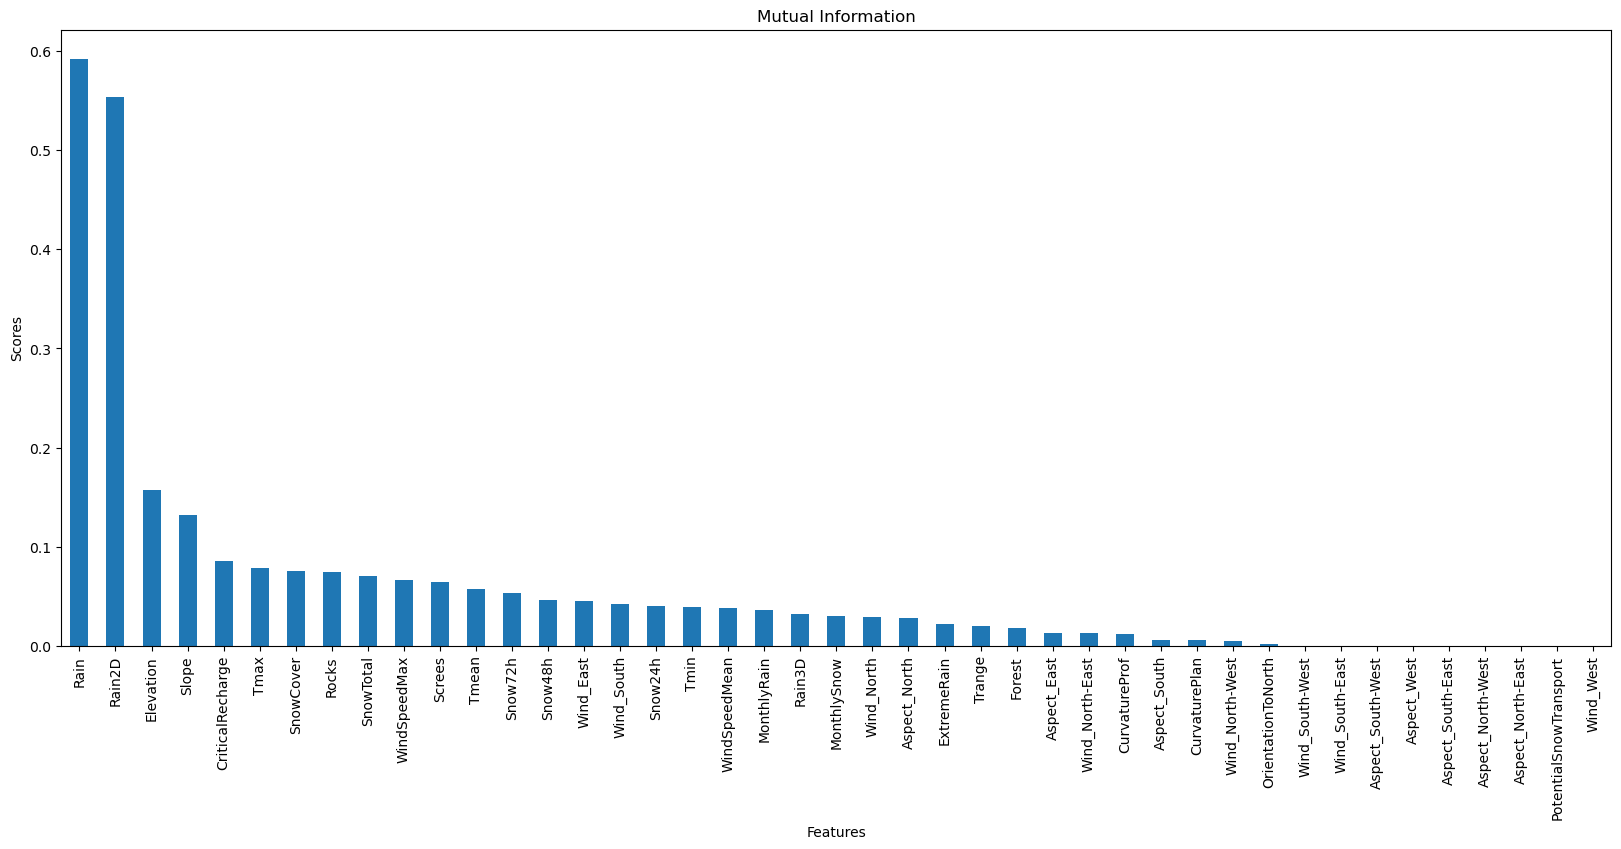

In [40]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))
plt.title('Mutual Information')
plt.xlabel("Features")
plt.ylabel("Scores")
plt.show();

**Extra Trees - feature importance**

In [ ]:
clf_et = ExtraTreesClassifier(criterion='entropy', random_state=5)
clf_et.fit(X_train, y_train)

In [ ]:
# Feature importances
clf_et.feature_importances_

In [ ]:
features = X_train.columns
importances=clf_et.feature_importances_
indices=np.argsort(importances)

plt.figure(figsize=(10, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative importance")
plt.show()

**Remove more irrelevant features.**

**Do it for train, valid and test sets.**

In [ ]:
X_train = X_train.drop(columns=['Aspect_South'])
X_train

In [ ]:
X_valid = X_valid.drop(columns=['Aspect_South'])
X_valid


In [ ]:
X_test = X_test.drop(columns=['Aspect_South'])
X_test


In [ ]:
y_test.shape, y_valid.shape, y_train.shape

In [ ]:
y_test.unique(), y_valid.unique(), y_train.unique()

In [ ]:
X_train.columns

**Save the train, valid, test sets for reproducibility of results during the stage of finalization and writing.**

In [ ]:
X_train.to_csv("D:/Allaus/Code/train/2_both_based_on_ptz/X_train.csv")

In [ ]:
X_valid.to_csv("D:/Allaus/Code/train/2_both_based_on_ptz/X_valid.csv")

In [ ]:
X_test.to_csv("D:/Allaus/Code/train/2_both_based_on_ptz/X_test.csv")

In [ ]:
y_train.to_csv("D:/Allaus/Code/train/2_both_based_on_ptz/y_train.csv")

In [ ]:
y_valid.to_csv("D:/Allaus/Code/train/2_both_based_on_ptz/y_valid.csv")

In [ ]:
y_test.to_csv("D:/Allaus/Code/train/2_both_based_on_ptz/y_test.csv")

**Read directly the datasets that I have already started with, for reproducibility of the results**

In [41]:
X_train = pd.read_csv("D:/Allaus/Code/train/2_both_based_on_ptz/X_train.csv", index_col='Unnamed: 0')
X_train

,Elevation,Slope,CurvaturePlan,CurvatureProf,Forest,Rocks,Screes,SnowCover,CriticalRecharge,Rain,...,Tmean,Trange,SnowTotal,Snow24h,Snow48h,Snow72h,MonthlySnow,WindSpeedMean,WindSpeedMax,Wind_South
197,2644,69,0.02,-1.39,0,1,0,0.477,445.400000,1.800000,...,1.3,8.6,69.4,2.5,4.8,6.9,53.7,5.8,23.3,1.0
1817,1991,45,-0.31,0.01,1,0,0,0.000,708.115472,2.000759,...,2.0,8.1,46.9,2.3,4.5,6.5,53.0,5.6,28.3,0.0
1320,2216,37,-0.04,0.30,1,0,0,0.403,381.116675,1.540058,...,-1.1,8.1,71.1,2.5,4.8,7.0,58.5,4.4,21.3,0.0
892,2623,52,0.15,-0.04,0,1,1,0.515,583.200000,1.800000,...,-0.2,8.2,70.8,2.5,4.8,6.9,53.8,5.6,24.4,1.0
2007,2545,25,-0.06,1.28,0,1,0,0.615,3369.407813,1.838391,...,1.2,8.6,70.7,2.6,4.9,7.1,56.2,5.4,22.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,1988,44,-0.55,0.17,1,0,0,0.000,843.267624,2.008032,...,1.9,7.8,39.8,2.0,3.9,5.8,48.0,5.9,36.0,0.0
1694,2488,24,-0.03,0.06,0,0,1,0.597,4076.033281,1.871961,...,-0.4,8.3,73.0,2.6,4.9,7.2,57.1,5.9,25.3,1.0
4,1371,70,0.46,0.35,1,0,0,0.000,78.900000,1.600000,...,5.5,10.0,47.4,2.2,4.2,6.2,50.7,5.7,12.9,0.0
1458,2072,58,-2.66,2.82,1,0,0,0.000,1531.608306,1.856617,...,1.9,8.7,67.0,2.5,4.6,6.7,50.8,6.2,23.9,1.0


In [42]:
X_valid = pd.read_csv("D:/Allaus/Code/train/2_both_based_on_ptz/X_valid.csv", index_col='Unnamed: 0')
X_valid

,Elevation,Slope,CurvaturePlan,CurvatureProf,Forest,Rocks,Screes,SnowCover,CriticalRecharge,Rain,...,Tmean,Trange,SnowTotal,Snow24h,Snow48h,Snow72h,MonthlySnow,WindSpeedMean,WindSpeedMax,Wind_South
503,2649,58,-0.37,0.84,0,1,1,0.514,458.700000,1.900000,...,-0.7,8.2,76.9,2.7,5.3,7.7,62.8,4.5,21.5,0.0
526,2331,44,0.17,0.41,1,0,1,0.518,1597.400000,2.100000,...,0.4,8.7,69.2,2.5,4.7,6.7,50.3,7.0,27.7,0.0
177,2099,59,-1.59,1.22,0,0,0,0.451,24.500000,1.900000,...,-1.1,8.2,79.1,2.8,5.4,8.0,64.9,4.9,22.5,1.0
1787,1775,39,0.07,-0.26,1,0,0,0.000,3009.213276,1.756251,...,4.2,9.3,52.0,2.3,4.4,6.4,51.8,5.5,15.8,0.0
2244,1306,38,0.62,0.39,1,1,0,0.000,1478.395470,1.980388,...,2.2,8.3,45.7,2.2,4.3,6.3,51.7,5.7,29.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,2380,73,0.17,-0.86,0,1,1,0.440,604.894305,1.794584,...,3.8,9.2,61.1,2.4,4.6,6.8,53.9,5.2,16.5,1.0
1645,2410,37,0.34,-0.49,0,1,0,0.587,4975.689632,1.774330,...,-0.3,8.3,72.6,2.6,4.9,7.2,57.7,4.6,21.8,0.0
1638,2412,33,-0.12,0.37,0,0,1,0.622,5840.643855,1.797927,...,3.6,9.2,62.1,2.4,4.7,6.8,54.1,5.3,17.2,1.0
749,2101,51,-0.21,0.00,1,1,0,0.495,2120.900000,2.000000,...,0.2,8.5,70.1,2.5,4.7,6.8,51.5,6.8,27.7,0.0


In [43]:
X_test = pd.read_csv("D:/Allaus/Code/train/2_both_based_on_ptz/X_test.csv", index_col='Unnamed: 0')
X_test

,Elevation,Slope,CurvaturePlan,CurvatureProf,Forest,Rocks,Screes,SnowCover,CriticalRecharge,Rain,...,Tmean,Trange,SnowTotal,Snow24h,Snow48h,Snow72h,MonthlySnow,WindSpeedMean,WindSpeedMax,Wind_South
565,1560,42,-0.16,-0.06,1,0,0,0.000,577.600000,1.800000,...,3.2,9.0,61.9,2.4,4.6,6.6,51.8,5.8,19.9,1.0
2155,1886,38,0.11,-0.18,0,0,0,0.000,2955.642736,1.967868,...,1.9,8.9,64.4,2.5,4.6,6.7,51.4,6.4,23.9,1.0
254,2771,54,0.02,0.06,0,0,1,0.620,652.900000,1.800000,...,1.3,8.6,69.8,2.5,4.8,7.0,54.7,5.6,22.9,1.0
1776,2192,39,0.28,-0.45,1,0,0,0.000,3182.434838,1.869471,...,1.6,8.6,67.3,2.5,4.6,6.7,50.1,6.4,24.9,0.0
1650,1763,36,0.02,0.02,1,0,0,0.000,1658.549471,1.850629,...,3.3,9.0,52.4,2.3,4.4,6.5,52.5,5.6,21.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2819,51,0.32,-0.78,0,1,1,0.530,1486.200000,2.100000,...,1.3,9.0,70.3,2.6,4.9,7.0,56.1,6.2,23.4,0.0
171,2299,53,-0.46,-0.25,0,0,0,0.488,87.600000,1.900000,...,-1.4,8.1,80.7,2.9,5.6,8.2,66.6,4.7,22.1,1.0
752,2089,52,-0.31,-0.85,0,0,0,0.441,101.300000,2.100000,...,-0.1,8.3,91.0,3.0,5.6,8.1,74.0,3.0,29.4,1.0
1801,1465,39,0.20,0.25,1,0,0,0.000,1001.013182,1.844463,...,5.2,9.0,50.0,2.3,4.3,6.3,51.7,3.6,10.0,0.0


In [44]:
y_train = pd.read_csv("D:/Allaus/Code/train/2_both_based_on_ptz/y_train.csv", index_col='Unnamed: 0')
y_train = y_train.Avalanche
y_train

197     1
1817    0
1320    0
892     1
2007    0
       ..
2192    0
1694    0
4       1
1458    0
464     1
Name: Avalanche, Length: 1380, dtype: int64

In [45]:
y_valid = pd.read_csv("D:/Allaus/Code/train/2_both_based_on_ptz/y_valid.csv", index_col='Unnamed: 0')
y_valid = y_valid.Avalanche
y_valid

503     1
526     1
177     1
1787    0
2244    0
       ..
1713    0
1645    0
1638    0
749     1
129     1
Name: Avalanche, Length: 460, dtype: int64

In [46]:
y_test = pd.read_csv("D:/Allaus/Code/train/2_both_based_on_ptz/y_test.csv", index_col='Unnamed: 0')
y_test = y_test.Avalanche
y_test

565     1
2155    0
254     1
1776    0
1650    0
       ..
847     1
171     1
752     1
1801    0
1665    0
Name: Avalanche, Length: 460, dtype: int64

**In case I want to try without the extra parameters I created --> The models become worse**

In [ ]:
len(X_train.columns)

In [ ]:
X_train_minus1 = X_train.drop(columns=['SnowCover', 'CriticalRecharge'])
X_train_minus1

In [ ]:
X_valid_minus1 = X_valid.drop(columns=['SnowCover', 'CriticalRecharge'])
X_valid_minus1

In [ ]:
X_test_minus1 = X_test.drop(columns=['SnowCover', 'CriticalRecharge'])
X_test_minus1

In [ ]:
X_train_minus2 = X_train.drop(columns=['SnowCover', 'CriticalRecharge', 'Rain', 'Rain2D',
       'Rain3D', 'ExtremeRain', 'MonthlyRain', 'Tmin', 'Tmax', 'Tmean',
       'Trange', 'SnowTotal', 'Snow24h', 'Snow48h', 'Snow72h', 'MonthlySnow',
       'WindSpeedMean', 'WindSpeedMax', 'Wind_South'])
X_train_minus2

In [ ]:
X_valid_minus2 = X_valid.drop(columns=['SnowCover', 'CriticalRecharge', 'Rain', 'Rain2D',
       'Rain3D', 'ExtremeRain', 'MonthlyRain', 'Tmin', 'Tmax', 'Tmean',
       'Trange', 'SnowTotal', 'Snow24h', 'Snow48h', 'Snow72h', 'MonthlySnow',
       'WindSpeedMean', 'WindSpeedMax', 'Wind_South'])
X_valid_minus2

In [ ]:
X_test_minus2 = X_test.drop(columns=['SnowCover', 'CriticalRecharge', 'Rain', 'Rain2D',
       'Rain3D', 'ExtremeRain', 'MonthlyRain', 'Tmin', 'Tmax', 'Tmean',
       'Trange', 'SnowTotal', 'Snow24h', 'Snow48h', 'Snow72h', 'MonthlySnow',
       'WindSpeedMean', 'WindSpeedMax', 'Wind_South'])
X_test_minus2

In [ ]:
y_train_minus1 = y_train
y_train_minus2 = y_train
y_valid_minus1 = y_valid
y_valid_minus2 = y_valid
y_test_minus1 = y_test
y_test_minus2 = y_test

In [ ]:
y_test_minus2.shape

In [ ]:
y_test.shape

In [ ]:
y_test_minus1

In [ ]:
frames_X_depl_minus1 = [X_train_minus1, X_valid_minus1]
frames_y_depl_minus1 = [y_train_minus1, y_valid_minus1]

frames_X_depl_minus2 = [X_train_minus2, X_valid_minus2]
frames_y_depl_minus2 = [y_train_minus2, y_valid_minus2]

In [ ]:
X_depl_minus1 = pd.concat(frames_X_depl_minus1)
y_depl_minus1 = pd.concat(frames_y_depl_minus1)

X_depl_minus2 = pd.concat(frames_X_depl_minus2)
y_depl_minus2 = pd.concat(frames_y_depl_minus2)


In [ ]:
y_train_minus1 = y_train.to_numpy().ravel()
y_train_minus2 = y_train.to_numpy().ravel()
y_valid_minus1 = y_valid.to_numpy().ravel()
y_valid_minus2 = y_valid.to_numpy().ravel()
# y_test_minus1 = y_test_minus1.to_numpy().ravel()
# y_test_minus2 = y_test_minus2.to_numpy().ravel()

In [ ]:
y_depl_minus1 = y_depl_minus1.to_numpy().ravel()
y_depl_minus2 = y_depl_minus2.to_numpy().ravel()

**Join training and validation sets for model deployment**

In [ ]:
frames_X = [X_train, X_valid]
frames_y = [y_train, y_valid]

In [ ]:
X_depl = pd.concat(frames_X)
y_depl = pd.concat(frames_y)

In [ ]:
X_depl.tail()

In [ ]:
y_depl = y_depl.to_numpy()
y_depl

In [ ]:
y_depl = y_depl.ravel()
y_depl

In [ ]:
y_depl.shape

In [ ]:
y_test = y_test.to_numpy().ravel()


In [ ]:
y_test.shape

# 1) Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import _tree

# Build and train initial tree

In [21]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X, y)

Plot trained tree


In [22]:
clf_dt.classes_

array([0, 1], dtype=int64)

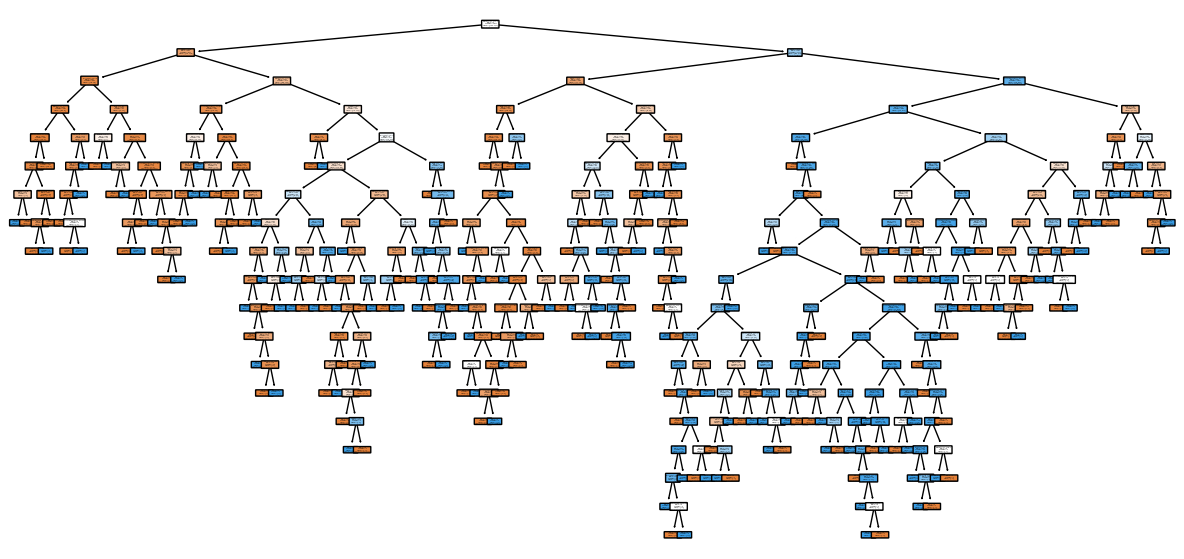

In [24]:
plt.figure(figsize=(15, 7))
plot_tree(clf_dt,
         filled = True,
         rounded = True,
         class_names = ['Not Susceptible', 'Susceptible'],
         feature_names = X.columns)                 # It is clearly overfitting!!!!!
#plt.savefig("D:/Allaus/Manuscript/pictures_and_figures/DT - overfitted")
plt.show();

# Check the performance of the initial model using the VALIDATION SET


Confusion matrix

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_dt, X_valid_minus2, y_valid_minus2, display_labels=['Not Susceptible', 'Susceptible'], cmap=plt.cm.Blues)
#plt.savefig('D:/Allaus/Data_analysis/ML/cm_initial.png', dpi=300)
#plt.title("Confusion Matrix")
plt.show()


Check other performance metrics

In [ ]:
p_pred = clf_dt.predict_proba(X_valid_minus2)       
y_pred = clf_dt.predict(X_valid_minus2)

In [ ]:
#p_pred

In [ ]:
score = clf_dt.score(X_valid_minus2, y_valid_minus2)
score

In [ ]:
print(metrics.accuracy_score(y_valid_minus2, y_pred))    # same as above cell, different way

# Check the performance of the initial model on unseen data (TEST SET)

Confusion matrix

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_dt, X_test, y_test, display_labels=['Not Susceptible', 'Susceptible'], cmap=plt.cm.Blues)
#plt.savefig('D:/Allaus/Data_analysis/ML/cm_initial.png', dpi=300)
plt.show()


Check other performance metrics

In [ ]:
p_pred = clf_dt.predict_proba(X_test)       
y_pred = clf_dt.predict(X_test)

In [ ]:
score = clf_dt.score(X_test, y_test)     
score                                    # Not amazing accuracy, thus I need to optimize the model
                                         # Here I chose to do pruning by optimizing the alpha parameter instead of
                                         # doing hyperparameter tuning, e.g., with GridSearchCV for all (or many of)
                                         # the parameters that the Decision Tree in sklearn has

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))    # same as above cell, different way

In [ ]:
print(metrics.recall_score(y_test, y_pred, pos_label=0))    

In [ ]:
print(metrics.precision_score(y_test, y_pred, pos_label=1))

# Compare the model's accuracy to null accuracy 
**Null Accuracy:** the accuracy that could be achieved by always predicting the most frequent class 

In [ ]:
y_valid.value_counts()       # pretty balanced

In [ ]:
# Calculate the percentage of ones
a = y_valid.mean()
a

In [ ]:
# Calculate the percentage of zeros
b = 1 - y_valid.mean()
b

In [ ]:
# Null accuracy for binary classification problems
if a > b:
    print(a)
else:
    print(b)

# Optimization with Cost Complexity Pruning

# Cost Complexity Pruning Part 1: Visualize alpha

In [ ]:
path = clf_dt.cost_complexity_pruning_path(X_train_minus2, y_train_minus2)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train_minus2, y_train_minus2)
    clf_dts.append(clf_dt)

In [ ]:
train_scores = [clf_dt.score(X_train_minus2, y_train_minus2) for clf_dt in clf_dts]
valid_scores = [clf_dt.score(X_valid_minus2, y_valid_minus2) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and validation sets')
ax.plot(ccp_alphas, train_scores, marker = 'o', label='training', drawstyle='steps-post')
ax.plot(ccp_alphas, valid_scores, marker = 'o', label='validation', drawstyle='steps-post')
ax.legend()
#plt.savefig("D:/Allaus/Manuscript/pictures_and_figures/DT - alpha vs accuracy")
plt.show();

# Cost Complexity Pruning Part 2: Cross validation for finding the best alpha

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.02)      

scores = cross_val_score(clf_dt, X_train_minus2, y_train_minus2, cv=10)
df = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--');


In [ ]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt, X_train_minus2, y_train_minus2, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                   y='mean_accuracy',
                   yerr='std',
                   marker='o',
                   linestyle='--');

In [ ]:
alpha_results[(alpha_results['alpha'] > 0.005)
             & (alpha_results['alpha'] < 0.02)]

In [90]:
ideal_ccp_alpha = 0.014

# Build and train a pruned version of the tree

In [ ]:
X_train

In [91]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha = ideal_ccp_alpha) 
clf_dt_pruned = clf_dt_pruned.fit(X, y)

# Check the performance of the pruned tree on the VALIDATION SET 

**Confusion matrix**

In [ ]:
plt.figure(figsize=(12, 8))
ConfusionMatrixDisplay.from_estimator(clf_dt_pruned, X_valid_minus2, y_valid_minus2, display_labels=['Not Susceptible', 'Susceptible'], cmap=plt.cm.Blues);
#plt.yticks(rotation = 90)
#plt.tight_layout
#plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/DT - CM_pruned_2', dpi=300, bbox_inches='tight')
plt.show();
# plt.yticks


**Other metrics**

In [ ]:
p_pred = clf_dt_pruned.predict_proba(X_valid_minus2)
y_pred = clf_dt_pruned.predict(X_valid_minus2)

In [ ]:
# # Store the predicted probabilities for class 1

# p_aval = p_pred[:,1]
# p_aval

In [ ]:
score = clf_dt_pruned.score(X_valid_minus2, y_valid_minus2)
score

In [ ]:
np.mean(cross_val_score(clf_dt_pruned, X_valid, y_valid, cv=10))

In [ ]:
print(metrics.accuracy_score(y_valid, y_pred))       # same as above, different way

In [ ]:
print(classification_report(y_valid, y_pred))

In [ ]:
print(metrics.recall_score(y_valid, y_pred, pos_label=1))

In [ ]:
print(metrics.precision_score(y_valid, y_pred, pos_label=1))

# Check the performance of the pruned tree on the TEST SET

**Only at the very end**

**Confusion matrix**

In [ ]:
clf_dt_pruned.classes_

In [ ]:
X_test

In [ ]:
X_depl

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_dt_pruned, X_test_minus2, y_test_minus2, display_labels=['Not Susceptible', 'Susceptible'], cmap=plt.cm.Blues)
#plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/DT - CM test', dpi=300, bbox_inches='tight')
plt.show()


**Check other performance metrics**

In [ ]:
p_pred = clf_dt_pruned.predict_proba(X_test_minus2)       
y_pred = clf_dt_pruned.predict(X_test_minus2)

In [ ]:
score = clf_dt_pruned.score(X_test_minus2, y_test_minus2)
score

In [ ]:
print(metrics.recall_score(y_test, y_pred, pos_label=1))

In [ ]:
print(metrics.precision_score(y_test, y_pred, pos_label=1))

In [ ]:
np.mean(cross_val_score(clf_dt_pruned, X_test_minus2, y_test_minus2, cv=10))

# Plot the pruned tree

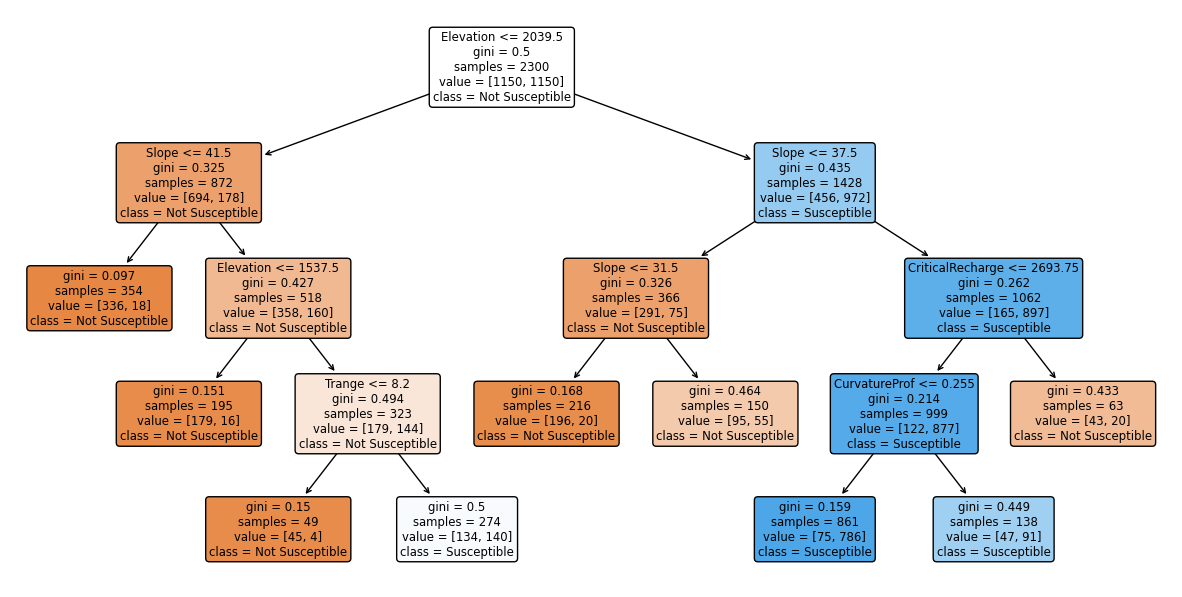

In [89]:
plt.figure(figsize=(15, 7.5))
# plt.savefig('D:/Allaus/Data_analysis/ML/tree.png', dpi=300)
plot_tree(clf_dt_pruned,
         filled = True,
         rounded = True,
         class_names = ['Not Susceptible', 'Susceptible'],
         feature_names = X.columns); 
#plt.savefig("D:/Allaus/Manuscript/pictures_and_figures/DT - for map")
plt.show();

**Plot the rules of the pruned tree**

In [ ]:
text_representation = tree.export_text(clf_dt_pruned, feature_names=(list(X.columns)), show_weights=True)
print(text_representation)

# Visualization with dtreeviz

In [ ]:
viz = dtreeviz(clf_dt_pruned,
               X_valid,
               y_valid,
               target_name = 'Avalanche',
               feature_names = X_train.columns)

In [ ]:
viz

# 2) Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Build the initial model

In [ ]:
clf_rf = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_split=10, random_state=5)
clf_rf.fit(X_train_minus2, y_train_minus2)

In [ ]:
# Feature importances
clf_rf.feature_importances_

In [ ]:
features = X_train.columns
importances=clf_rf.feature_importances_
indices=np.argsort(importances)

plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative importance")
plt.show()

# Check the accuracy of the initial model (VALIDATION SET)

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_rf, X_valid_minus2, y_valid_minus2, display_labels=['Not Susceptible', 'Susceptible'], cmap=plt.cm.Blues)
#plt.savefig('D:/Allaus/Data_analysis/ML/cm_initial.png', dpi=300)
plt.show()
 

In [ ]:
y_pred = clf_rf.predict(X_valid_minus2)

In [ ]:
accuracy_score(y_valid_minus2, y_pred)

In [ ]:
# This is an alternative to the train-valid-test split, that shows us the variance of the accuracy 
# by bootstrapping the X with 10-fold cross-validation

np.mean(cross_val_score(clf_rf, X_valid_minus2, y_valid_minus2, cv=10))

In [ ]:
print(classification_report(y_valid_minus2, y_pred))

# Check the accuracy of the initial model (TEST SET)

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_rf, X_test, y_test, display_labels=['Susceptible', 'Not susceptible'], cmap=plt.cm.Blues)
#plt.savefig('D:/Allaus/Data_analysis/ML/cm_initial.png', dpi=300)
plt.show()


In [ ]:
y_pred = clf_rf.predict(X_test)
accuracy_score(y_test, y_pred)          

In [ ]:
print(metrics.classification_report(y_test, y_pred))

# Optimization

**Alternative A:** RandomizedSearchCV() to make the optimization quicker

In [ ]:
model = RandomForestClassifier(n_jobs = -1)

parameters = {'min_samples_split': sp_randInt(2, 8),
              'criterion': ('gini', 'entropy'),
              'n_estimators': sp_randInt(10, 200),
              'max_depth': sp_randInt(5, 8)}

rf_grid_randm = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=10, n_iter=100, n_jobs=-1)

rf_grid_randm.fit(X_train, y_train)

print(rf_grid_randm.best_estimator_)
print(rf_grid_randm.best_score_)
print(rf_grid_randm.best_params_)           

**Alterntive B:** GridSearchCV(), more thorough but also slower

In [ ]:
parameters = {'n_estimators': (100, 200),
              'criterion': ('gini', 'entropy'),
              'max_depth': (3, 5, 7),
              'max_features': ['sqrt'],
              'min_samples_split': (2, 4, 6, 8),
              'min_weight_fraction_leaf': (0.0, 0.1, 0.2, 0.3)
}

In [ ]:
rf_grid = GridSearchCV(RandomForestClassifier(n_jobs = -1, oob_score = False), param_grid = parameters, cv=10, verbose = True)


In [ ]:
rf_grid_model = rf_grid.fit(X_train, y_train)

In [ ]:
rf_grid_model.best_estimator_         

In [ ]:
rf_grid_model.best_score_

# Build the model with the best estimates

In [62]:
clf_rf = RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=4, n_estimators=139,
                       n_jobs=-1, random_state=42)
clf_rf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=4,
                       n_estimators=139, n_jobs=-1, random_state=42)

In [ ]:
plt.figure(figsize=(12, 8))
ConfusionMatrixDisplay.from_estimator(clf_rf, X_valid_minus2, y_valid_minus2, display_labels=['Not susceptible', 'Susceptible'], cmap=plt.cm.Blues)
#plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/RF optimized - CM', dpi=300, bbox_inches='tight')
plt.show();


In [ ]:
#clf_rf.estimators_

In [63]:
len(clf_rf.estimators_)      # of course

139

In [64]:
max = 0
idx_max = 0
min = 1
idx_min = 0
for i in range(len(clf_rf.estimators_)):
    if clf_rf.estimators_[i].score(X_valid, y_valid) > max:
        max = clf_rf.estimators_[i].score(X_valid, y_valid)
        idx_max = i
    elif clf_rf.estimators_[i].score(X_valid, y_valid) < min:
        min = clf_rf.estimators_[i].score(X_valid, y_valid)
        idx_min = i

print(idx_max)
print(max)
print(idx_min)
print(min)

C:\Users\ginam\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\ginam\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\ginam\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\ginam\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\ginam\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\ginam\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier 

C:\Users\ginam\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\ginam\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\ginam\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\ginam\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\ginam\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\ginam\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier 

43
0.854347826087
128
0.728260869565


C:\Users\ginam\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\ginam\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\ginam\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\ginam\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\ginam\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\ginam\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier 

In [65]:
clf_rf.estimators_[43].score(X_valid.values, y_valid.values)         # check for the best estimator

0.85434782608695647

In [ ]:
y_pred = clf_rf.predict(X_valid_minus2)

In [ ]:
accuracy_score(y_valid_minus2, y_pred)

In [ ]:
clf_rf.score(X_valid, y_valid)

In [ ]:
np.mean(cross_val_score(clf_rf, X_valid_minus2, y_valid_minus2, cv=10))

In [ ]:
print(metrics.recall_score(y_valid, y_pred, pos_label=1))

In [ ]:
print(metrics.precision_score(y_valid, y_pred, pos_label=1))

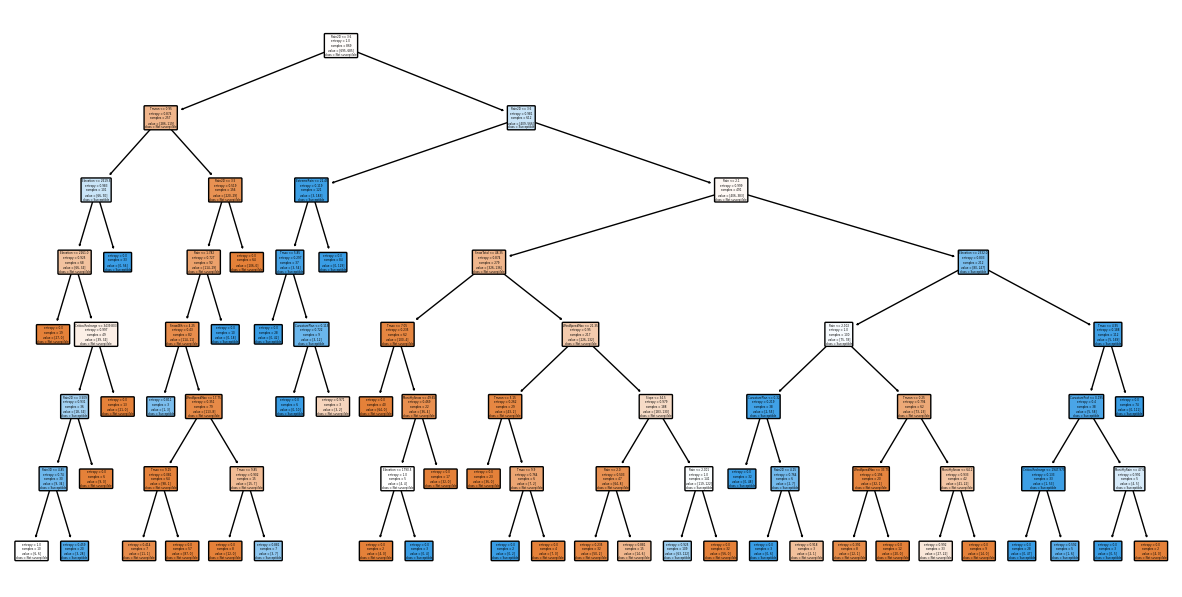

In [66]:
plt.figure(figsize=(15, 7.5))
# plt.savefig('D:/Allaus/Data_analysis/ML/tree.png', dpi=300)
plot_tree(clf_rf[43],
         filled = True,
         rounded = True,
         class_names = ['Not susceptible', 'Susceptible'],
         feature_names = X_train.columns);                     

In [67]:
X_train.columns

Index(['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf', 'Forest',
       'Rocks', 'Screes', 'SnowCover', 'CriticalRecharge', 'Rain', 'Rain2D',
       'Rain3D', 'ExtremeRain', 'MonthlyRain', 'Tmin', 'Tmax', 'Tmean',
       'Trange', 'SnowTotal', 'Snow24h', 'Snow48h', 'Snow72h', 'MonthlySnow',
       'WindSpeedMean', 'WindSpeedMax', 'Wind_South'],
      dtype='object')

In [68]:
lista = X_train.columns.values.tolist()
#lista

['Elevation',
 'Slope',
 'CurvaturePlan',
 'CurvatureProf',
 'Forest',
 'Rocks',
 'Screes',
 'SnowCover',
 'CriticalRecharge',
 'Rain',
 'Rain2D',
 'Rain3D',
 'ExtremeRain',
 'MonthlyRain',
 'Tmin',
 'Tmax',
 'Tmean',
 'Trange',
 'SnowTotal',
 'Snow24h',
 'Snow48h',
 'Snow72h',
 'MonthlySnow',
 'WindSpeedMean',
 'WindSpeedMax',
 'Wind_South']

In [70]:
text_repr = tree.export_text(clf_rf.estimators_[43], feature_names = lista, show_weights=True)  
print(text_repr)  

|--- Rain2D <= 3.60
|   |--- Tmean <= 0.95
|   |   |--- Elevation <= 2619.50
|   |   |   |--- Elevation <= 2261.00
|   |   |   |   |--- weights: [27.00, 0.00] class: 0.0
|   |   |   |--- Elevation >  2261.00
|   |   |   |   |--- CriticalRecharge <= 3439.80
|   |   |   |   |   |--- Rain2D <= 3.51
|   |   |   |   |   |   |--- Rain3D <= 4.85
|   |   |   |   |   |   |   |--- weights: [6.00, 6.00] class: 0.0
|   |   |   |   |   |   |--- Rain3D >  4.85
|   |   |   |   |   |   |   |--- weights: [3.00, 28.00] class: 1.0
|   |   |   |   |   |--- Rain2D >  3.51
|   |   |   |   |   |   |--- weights: [9.00, 0.00] class: 0.0
|   |   |   |   |--- CriticalRecharge >  3439.80
|   |   |   |   |   |--- weights: [21.00, 0.00] class: 0.0
|   |   |--- Elevation >  2619.50
|   |   |   |--- weights: [0.00, 56.00] class: 1.0
|   |--- Tmean >  0.95
|   |   |--- Rain2D <= 3.50
|   |   |   |--- Rain <= 1.78
|   |   |   |   |--- Snow48h <= 4.25
|   |   |   |   |   |--- weights: [1.00, 3.00] class: 1.0
|   |   |  

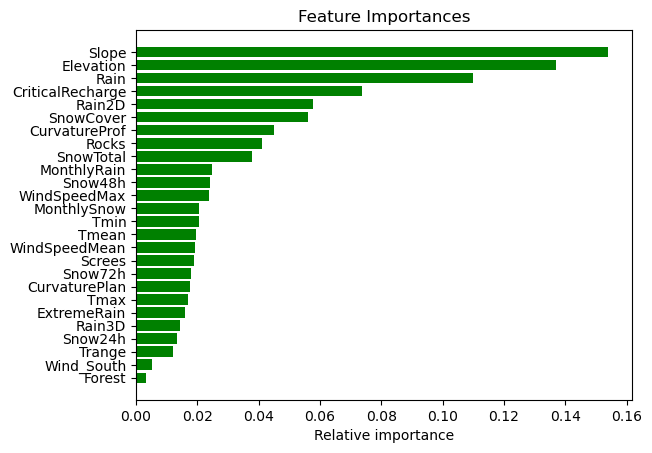

In [72]:
features = X_train.columns
importances=clf_rf.feature_importances_
indices=np.argsort(importances)

plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative importance")
plt.savefig("D:/Allaus/Manuscript/pictures_and_figures/RF - feature importance", dpi=300, bbox_inches='tight')
plt.show()

# Performance on TEST SET

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_rf, X_test_minus2, y_test_minus2, display_labels=['Susceptible', 'Not susceptible'], cmap=plt.cm.Blues)
#plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/RF - CM test', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
y_pred = clf_rf.predict(X_test_minus2)

In [ ]:
print(classification_report(y_test_minus2, y_pred))

In [ ]:
np.mean(cross_val_score(clf_rf, X_test_minus2, y_test_minus2, cv=10))

# 3) Extra Trees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Build the initial model

In [ ]:
clf_et = ExtraTreesClassifier(criterion='entropy', random_state=5)
clf_et.fit(X_train, y_train)

In [ ]:
# Feature importances
clf_et.feature_importances_

In [ ]:
features = X_train.columns
importances=clf_et.feature_importances_
indices=np.argsort(importances)

plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative importance")
plt.show()

# Check the accuracy of the initial model (VALIDATION SET)

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_et, X_valid, y_valid, display_labels=['Not susceptible', 'Susceptible'], cmap=plt.cm.Blues)
#plt.savefig('D:/Allaus/Data_analysis/ML/cm_initial.png', dpi=300)
plt.show()


In [ ]:
y_pred = clf_et.predict(X_valid)

In [ ]:
accuracy_score(y_valid, y_pred)

In [ ]:
cross_val_score(clf_et, X_valid, y_valid, cv=10) 

# Optimization

In [ ]:
# # Alternative A: Very slow, I'm not going to use it

# parameters = {'n_estimators': (10, 30, 50, 70, 90, 100),
#               'criterion': ('gini', 'entropy', 'log_loss'),
#               'max_depth': (3, 5, 7, 9),
#               'max_features': ['sqrt'],
#               'min_samples_split': (2, 4, 6),
#               'min_weight_fraction_leaf': (0.0, 0.1, 0.2, 0.3)
# }

# et_grid = GridSearchCV(ExtraTreesClassifier(n_jobs = -1, oob_score = False), param_grid = parameters, cv=10, verbose = True)


In [ ]:
# et_grid_model = et_grid.fit(X_train, y_train)
# et_grid_model.best_estimator_ 
# et_grid_model.best_score_
# et_grid_model.best_params_

In [ ]:
# Alternative B: A looot faster

model = ExtraTreesClassifier(n_jobs = -1)

parameters = {'min_samples_split': sp_randInt(2, 10),
              'criterion': ('gini', 'entropy', 'log_loss'),
              'min_weight_fraction_leaf': sp_randFloat(0.0, 0.5),
              'n_estimators': sp_randInt(10, 100),
              'max_depth': sp_randInt(5, 7)}

et_grid_randm = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=10, n_iter=100, n_jobs=-1)

et_grid_randm.fit(X_train, y_train)

print(et_grid_randm.best_estimator_)
print(et_grid_randm.best_score_)
print(et_grid_randm.best_params_)           # I'm gonna use this, cause it's a lot faster

# Build the model with the best estimates

In [ ]:
clf_et = ExtraTreesClassifier(criterion='gini', max_depth=9, min_samples_split=4, max_features = 'sqrt',
                     min_weight_fraction_leaf=0,
                     n_estimators=90, n_jobs=-1)
clf_et.fit(X_train, y_train)

In [ ]:
#clf_et.estimators_

In [ ]:
max = 0
idx_max = 0
min = 1
idx_min = 0
for i in range(len(clf_et.estimators_)):
    if clf_et.estimators_[i].score(X_valid, y_valid) > max:
        max = clf_et.estimators_[i].score(X_valid, y_valid)
        idx_max = i
    elif clf_et.estimators_[i].score(X_valid, y_valid) < min:
        min = clf_et.estimators_[i].score(X_valid, y_valid)
        idx_min = i

print(idx_max)
print(max)
print(idx_min)
print(min)

In [ ]:
plt.figure(figsize=(15, 7.5))
# plt.savefig('D:/Allaus/Data_analysis/ML/tree.png', dpi=300)
plot_tree(clf_et[4],
         filled = True,
         rounded = True,
         class_names = ['Not susceptible', 'Susceptible'],
         feature_names = X_train.columns);                     

# Performance on VALIDATION SET

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_et, X_valid, y_valid, display_labels=['Not susceptible', 'Susceptible'], cmap=plt.cm.Blues)
#plt.savefig('D:/Allaus/Data_analysis/ML/cm_initial.png', dpi=300)
plt.show()           # Worse than before optimization......


In [ ]:
y_pred = clf_et.predict(X_valid)

In [ ]:
accuracy_score(y_valid, y_pred)

In [ ]:
clf_et.score(X_valid, y_valid)    # Bad accuracy, I will probably use it only for feature selection

In [ ]:
print(metrics.recall_score(y_valid, y_pred, pos_label=1))

In [ ]:
print(metrics.precision_score(y_valid, y_pred, pos_label=1))

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_et, X_test, y_test, display_labels=['Not susceptible', 'Susceptible'], cmap=plt.cm.Blues)
#plt.savefig('D:/Allaus/Data_analysis/ML/cm_initial.png', dpi=300)
plt.show()           # Worse than before optimization......


In [ ]:
y_pred = clf_et.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

# 4) AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# ----- Short way ------

In [ ]:
# Alternative A: Very slow

ada = AdaBoostClassifier()
search_grid = {'n_estimators': [100, 150, 200], 'learning_rate': [0.1, 0.03, 0.5]}
search = GridSearchCV(estimator = ada, param_grid = search_grid, scoring = 'accuracy', n_jobs = -1, cv = 10)

In [ ]:
search.fit(X_train, y_train)            # It takes toooo long
print(search.best_params_)
print(search.best_score_)

In [ ]:
# Alternative B: A looot faster

model = AdaBoostClassifier()

parameters = {'learning_rate': (0.1, 0.3, 0.5),
              'n_estimators': sp_randInt(10, 500)}

ada_grid_randm = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=10, n_iter=100, n_jobs=-1)

ada_grid_randm.fit(X_train_minus1, y_train_minus1)

print(ada_grid_randm.best_estimator_)
print(ada_grid_randm.best_score_)
print(ada_grid_randm.best_params_)           # I'm gonna use this, cause it's faster (but still very slow)

# Build of model with otimized parameters

In [ ]:
ada = AdaBoostClassifier(learning_rate=0.5, n_estimators=425, random_state=42)
ada.fit(X_train, y_train)

# Performance based on VALIDATION SET

In [ ]:
ConfusionMatrixDisplay.from_estimator(ada, X_valid_minus2, y_valid_minus2, display_labels=['Not susceptible', 'Susceptible'], cmap=plt.cm.Blues)
#plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/ada optimized - CM', dpi=300, bbox_inches='tight')
plt.show();


In [ ]:
y_pred = ada.predict(X_valid_minus2)

In [ ]:
accuracy_score(y_valid_minus2, y_pred)

In [ ]:
score = np.mean(cross_val_score(ada, X_valid_minus2, y_valid_minus2, scoring='accuracy', cv=10, n_jobs=-1))  
score

In [ ]:
print(metrics.recall_score(y_valid, y_pred, pos_label=1))

In [ ]:
print(metrics.precision_score(y_valid, y_pred, pos_label=1))

In [ ]:
ConfusionMatrixDisplay.from_estimator(ada, X_test_minus2, y_test_minus2, display_labels=['Not susceptible', 'Susceptible'], cmap=plt.cm.Blues)
#plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/ada - CM test', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
y_pred = ada.predict(X_test_minus2)

In [ ]:
print(metrics.classification_report(y_test_minus2, y_pred))

In [ ]:
score = np.mean(cross_val_score(ada, X_test_minus1, y_test_minus1, scoring='accuracy', cv=10, n_jobs=-1))  
score

# ------- Longer way --------

In [ ]:
class DecisionStump:
    
    def __init__(self):
        self.polarity = 1
        self. geature_idx = None
        self.threshold = None
        self.alpha = None
        
    def predict(self, X):
        n_samples = X.shape[0]
        X_column = X.iloc[:, self.feature_idx]
        
        predictions = np.ones(n_samples)
        if self.polarity ==1:
            predictions[X_column < self.threshold] = -1
        else:
            predictions[X_column > self.threshold] = -1
        return predictions

class Adaboost:
    
    def __init__(self, n_clf=5):
        self.n_clf = n_clf
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # init weights
        w = np.full(n_samples, (1 / n_samples))
        
        self.clfs = []
        for _ in range(self.n_clf):
            clf = DecisionStump()
            
            min_error = float('inf')
            
            for feature_i in range(n_features):
                X_column = X.iloc[:, feature_i]
                thresholds = np.unique(X_column)
                
                for threshold in thresholds:
                    p = 1
                    predictions = np.ones(n_samples)
                    predictions[X_column < threshold] = -1
                    
                    missclassified = w[y != predictions]
                    error = sum(missclassified)
                    
                    if error > 0.5:
                        error = 1 - error
                        p = -1
                    if error < min_error:
                        min_error = error
                        clf.polarity = p
                        clf.threshold = threshold
                        clf.feature_idx = feature_i
            
            EPS = 1e-10
            clf.alpha = 0.5 * np.log((1 - min_error) / (min_error + EPS))
            
            predictions = clf.predict(X)
            
            w *= np.exp(-clf.alpha * y * predictions)
            w /= np.sum(w)
            
            self.clfs.append(clf)
            
    
    def predict(self, X):
        clf_preds = [clf.alpha * clf.predict(X) for clf in self.clfs]
        y_pred = np.sum(clf_preds, axis=0)
        y_pred = np.sign(y_pred)
        return y_pred


In [ ]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [ ]:
y_train.unique()

In [ ]:
y_train[y_train == 0] = -1
y_train.unique()

In [ ]:
y_valid.unique()

In [ ]:
y_valid[y_valid == 0] = -1
y_valid.unique()

In [ ]:
y_test.unique()

In [ ]:
y_test[y_test == 0] = -1
y_test.unique()

In [ ]:
# Adaboost classification with 500 weak classifiers   It takes a loooong time to run, but has good accuracy probably
clf_ada = Adaboost(n_clf=500)
clf_ada.fit(X_train, y_train)

# Performance based on VALIDATION SET

In [ ]:
y_pred = clf_ada.predict(X_valid)

acc = accuracy(y_valid, y_pred)
print("Accuracy:", acc)

# 5) Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Parameter optimization

In [ ]:
# ROUND 1: Optimization of hyperparamaters with cross validation
param_grid = {
    'max_depth': [1, 3, 5],
    'learning_rate': [0.1, 0.3, 0.5],
    'subsample': [0.5, 0.75, 1],
    'random_state': [1],
    'n_estimators': [100, 500]
}

optimal_params = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, scoring='roc_auc', 
                              verbose=0, n_jobs=-1, cv=10)

optimal_params.fit(X_train_minus1, y_train_minus1)

print(optimal_params.best_params_)

In [ ]:
# ROUND 2      # It takes a long time to run!!!
               # It is the optimization of the n_estimators that takes so long. The more the merrier (until some point
               # that my computer is not powerful enough to reach.)
               # That's why I can just set the maximum trees that I want to be created.
               # Or I can try the RandomizedSearchCV().
                
param_grid = {
    'max_depth': [5],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.75],
    'random_state': [1],
    'n_estimators': [500]
}

optimal_params = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, scoring='roc_auc', 
                              verbose=0, n_jobs=-1, cv=10)

optimal_params.fit(X_train_minus1, y_train_minus1)

print(optimal_params.best_params_)


# Building and training of the model with the optimized parameters

In [73]:
GBC = GradientBoostingClassifier(max_depth=5, learning_rate=0.1, subsample=0.75, random_state=1, n_estimators=1000)
GBC.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=1000, random_state=1,
                           subsample=0.75)

# Confusion matrix using the VALIDATION SET

In [ ]:
ConfusionMatrixDisplay.from_estimator(GBC, X_valid_minus2, y_valid_minus2, values_format = 'd', display_labels=['Not susceptible', 'Susceptible'], cmap=plt.cm.Blues)
#plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/gradient boost optimized - CM', dpi=300, bbox_inches='tight')
plt.show();


In [ ]:
y_pred = GBC.predict(X_valid)

In [ ]:
accuracy_score(y_valid, y_pred)

In [ ]:
score = np.mean(cross_val_score(GBC, X_valid, y_valid, scoring='accuracy', cv=10, n_jobs=-1))  
score

In [ ]:
print(metrics.recall_score(y_valid, y_pred, pos_label=1))

In [ ]:
print(metrics.precision_score(y_valid, y_pred, pos_label=1))

In [ ]:
ConfusionMatrixDisplay.from_estimator(GBC, X_test_minus2, y_test_minus2, values_format = 'd', display_labels=['Not susceptible', 'Susceptible'], cmap=plt.cm.Blues)
#plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/gradient boost - CM test', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
y_pred = GBC.predict(X_test_minus2)

In [ ]:
print(metrics.classification_report(y_test_minus2, y_pred))

In [ ]:
score = np.mean(cross_val_score(GBC, X_test_minus1, y_test_minus1, scoring='accuracy', cv=10, n_jobs=-1))  
score

# Other metrics

In [ ]:
y_train_pred = GBC.predict_proba(X_train)[:,1]
y_valid_pred = GBC.predict_proba(X_valid)[:,1]
#y_test_pred = GBC.predict_proba(X_test)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                                      roc_auc_score(y_valid, y_valid_pred)))

# print("AUC Train: {:.4f}\nAUC Valid: {:.4f}\nAUC Test: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
#                                                                       roc_auc_score(y_valid, y_valid_pred),
#                                                                       roc_auc_score(y_test, y_test_pred)))

In [ ]:
l = [tree for tree in GBC.staged_predict_proba(X_train)]
trees = np.stack(l)
trees.shape

In [ ]:
y_train_pred_trees = np.stack([tree for tree in GBC.staged_predict_proba(X_train)])[:,:,1]
y_valid_pred_trees = np.stack([tree for tree in GBC.staged_predict_proba(X_valid)])[:,:,1]
#y_test_pred_trees = np.stack([tree for tree in GBC.staged_predict_proba(X_test)])[:,:,1]

y_train_pred_trees.shape, y_valid_pred_trees.shape#, y_test_pred_trees.shape

In [ ]:
# y_train_pred_trees = np.stack(list(GBC.staged_predict_proba(X_train)))[:,:,1]  # for some reason it doesn't work now
# y_valid_pred_trees = np.stack(list(GBC.staged_predict_proba(X_valid)))[:,:,1]
# y_test_pred_trees = np.stack(list(GBC.staged_predict_proba(X_test)))[:,:,1]

# y_train_pred_trees.shape, y_valid_pred_trees.shape, y_test_pred_trees.shape

In [ ]:
auc_train_trees = [roc_auc_score(y_train, y_pred) for y_pred in y_train_pred_trees]
auc_valid_trees = [roc_auc_score(y_valid, y_pred) for y_pred in y_valid_pred_trees]
#auc_test_trees = [roc_auc_score(y_test, y_pred) for y_pred in y_test_pred_trees]

**Plot the curves**

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(auc_train_trees, label='Train Data')
plt.plot(auc_valid_trees, label='Validation Data')
#plt.plot(auc_test_trees, label='Test Data')

plt.title('AUC vs Number of Trees')
plt.ylabel('AUC')
plt.xlabel('Number of Trees')
plt.legend()

plt.savefig("D:/Allaus/Manuscript/pictures_and_figures/gradient boost - number of trees")
plt.show();

# Importance of features

In [74]:
pd.DataFrame({"Variable_Name":X_train.columns,
              "Importance":GBC.feature_importances_}).sort_values('Importance', ascending=False)



,Variable_Name,Importance
0,Elevation,0.280100
1,Slope,0.212363
9,Rain,0.186761
8,CriticalRecharge,0.079102
10,Rain2D,0.058505
3,CurvatureProf,0.048110
13,MonthlyRain,0.021624
2,CurvaturePlan,0.017403
18,SnowTotal,0.017283
17,Trange,0.011402


In [75]:
# Alternative: Adding colors to the data frame

feat = pd.DataFrame({"Variable_Name":X_train.columns, "Importance":GBC.feature_importances_})
cm = sns.light_palette("green", as_cmap=True)
s = feat.style.background_gradient(cmap=cm)
s

,Variable_Name,Importance
0,Elevation,0.280100
1,Slope,0.212363
2,CurvaturePlan,0.017403
3,CurvatureProf,0.048110
4,Forest,0.000269
5,Rocks,0.001304
6,Screes,0.001705
7,SnowCover,0.008198
8,CriticalRecharge,0.079102
9,Rain,0.186761


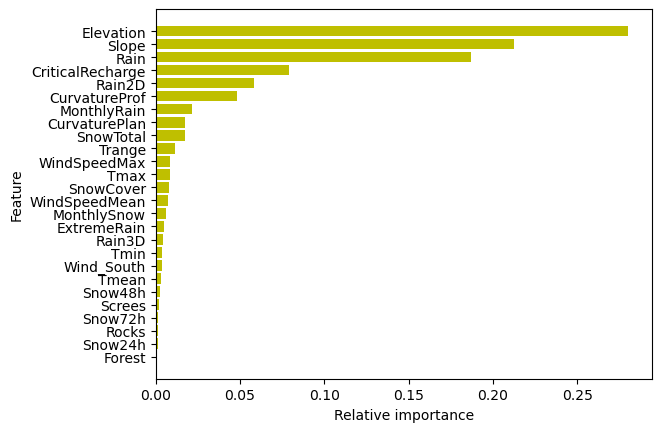

In [80]:
features = X_train.columns
importances=GBC.feature_importances_
indices=np.argsort(importances)

#plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.ylabel("Feature")
plt.xlabel("Relative importance")
plt.savefig("D:/Allaus/Manuscript/pictures_and_figures/gradient boost - feature importance", dpi=300, bbox_inches='tight')
plt.show();

# 6) XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', seed=42, early_stopping_rounds=10, 
                            eval_metric='aucpr', random_state=42)
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            eval_set=[(X_valid, y_valid)])


# Confusion matrix using the VALIDATION SET

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_xgb, X_valid, y_valid, values_format = 'd', display_labels=['Not susceptible', 'Susceptible'], cmap=plt.cm.Blues)
#plt.savefig('D:/Allaus/Data_analysis/ML/cm_initial.png', dpi=300)
plt.show()  


# Hyperparameter tuning

In [ ]:
# ROUND 1: Optimization of hyperparamaters with cross validation 
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.3, 0.5],
    'gamma': [0, 0.25, 1],
    'reg_lambda': [0, 1, 10],
    'scale_pos_weight': [1, 3, 5]
}

optimal_params = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic', seed=42,
                                                          early_stopping_rounds=10, 
                                                          eval_metric='auc',
                                                          #subsample=0.9, 
                                                          #colsample_bytree=0.5
                                                         ),
                              param_grid=param_grid,
                              scoring='roc_auc',
                              verbose=0,  # if you want to see what Grid Search is doing you put 2 instead of 0
                              n_jobs=-1, 
                              cv=10)

optimal_params.fit(X_train_minus1,
                   y_train_minus1,
                   eval_set=[(X_valid_minus1, y_valid_minus1)],
                   verbose=False)

print(optimal_params.best_params_)

In [ ]:
# ROUND 2
param_grid = {
    'max_depth': [3],
    'learning_rate': [0,5, 0.7, 0.9],
    'gamma': [0],
    'reg_lambda': [1],
    'scale_pos_weight': [1]
}

optimal_params = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic', seed=42,
                                                          early_stopping_rounds=10, 
                                                          eval_metric='auc',
                                                          #subsample=0.9, 
                                                          #colsample_bytree=0.5
                                                         ),
                              param_grid=param_grid,
                              scoring='roc_auc',
                              verbose=0,  # if you want to see what Grid Search is doing you put 2 instead of 0
                              n_jobs=-1, 
                              cv=10)

optimal_params.fit(X_train_minus1,
                   y_train_minus1,
                   eval_set=[(X_valid_minus1, y_valid_minus1)],
                   verbose=False)

print(optimal_params.best_params_)

# Building the model with the optimized parameters

In [ ]:
# Now that we have optimised the hyperparameters, we can build the final XGBoost model
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                            seed=42, 
                            #early_stopping_rounds=10, 
                            #eval_metric='aucpr', 
                            gamma=0, 
                            learning_rate=0.7, 
                            max_depth=3, 
                            reg_lambda=1, 
                            scale_pos_weight=1,
                            #subsample=0.9, 
                            #colsample_bytree=0.5
                           )

clf_xgb.fit(X_depl_minus1, 
            y_depl_minus1,
            verbose=True)#,
            #eval_set=[(X_test, y_test)])

# Confusion matrix using the VALIDATION SET

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_xgb, X_valid, y_valid, values_format = 'd', display_labels=['Not susceptible', 'Susceptible'], cmap=plt.cm.Blues)
#plt.savefig('D:/Allaus/Data_analysis/ML/cm_initial.png', dpi=300)
plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/xgboost - CM', dpi=300, bbox_inches='tight')
plt.show();


In [ ]:
y_pred = clf_xgb.predict(X_valid)


In [ ]:
accuracy_score(y_valid, y_pred)

In [ ]:
print(metrics.recall_score(y_valid, y_pred, pos_label=1))

In [ ]:
print(metrics.precision_score(y_valid, y_pred, pos_label=1))

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_xgb, X_test, y_test, values_format = 'd', display_labels=['Not susceptible', 'Susceptible'], cmap=plt.cm.Blues)
plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/xgboost - CM test', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
y_pred = clf_xgb.predict(X_depl)

In [ ]:
print(metrics.classification_report(y_depl, y_pred))

In [ ]:
inputs = pd.DataFrame(X_test_minus2).reset_index()
inputs

# Cross validation

In [ ]:
acc_per_fold = []

# Merge inputs and targets
# inputs = np.concatenate((X_depl, X_test), axis=0)
# targets = np.concatenate((y_depl, y_test), axis=0)
inputs = pd.DataFrame(X_test_minus1).reset_index().drop(columns=["index"])
targets = pd.DataFrame(y_test_minus1).reset_index().drop(columns=["index"])

# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    

    # Fit data to model
    clf_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                                seed=42, 
                                early_stopping_rounds=10, 
                                eval_metric='aucpr', 
                                gamma=0, 
                                learning_rate=0.7, 
                                max_depth=3, 
                                reg_lambda=1, 
                                scale_pos_weight=1,
                                #subsample=0.9, 
                                #colsample_bytree=0.5
                               )

    clf_xgb.fit(X_depl_minus1, 
                y_depl_minus1,
                verbose=True,
                eval_set=[(inputs.loc[train, :], targets.loc[train, :])])

    # Generate generalization metrics
    y_pred = clf_xgb.predict(inputs.loc[test, :])
    score = accuracy_score(targets.loc[test, :], y_pred)
    print(f'Score for fold {fold_no}: {score*100}%')
    acc_per_fold.append(score * 100)

    # Increase fold number
    fold_no = fold_no + 1

In [ ]:
acc_per_fold

# Plot one (the first) tree

This way we can get a first idea of the parameters, in order to know better how to optimize them next

In [ ]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                            seed=42, 
                            early_stopping_rounds=10, 
                            eval_metric='aucpr', 
                            gamma=0.25, 
                            learning_rate=0.3, 
                            max_depth=5, 
                            reg_lambda=1, 
                            scale_pos_weight=1,
                            #subsample=0.9, 
                            #colsample_bytree=0.5
                            n_estimators=1)

clf_xgb.fit(X_train, y_train,
            eval_set=[(X_valid, y_valid)])

bst = clf_xgb.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: '% importance_type, bst.get_score(importance_type=importance_type))

node_params = {'shape': 'box',
               'style': 'filled, rounded',
               'fillcolor': '#78cbe',
              }
leaf_params = {'shape': 'box',
               'style': 'filled',
               'fillcolor': '#e48038'}

xgb.to_graphviz(clf_xgb, num_trees=0, size='10, 10', condition_node_params=node_params, leaf_node_params=leaf_params)

# # if you want to save the figure
# graph_data = xgb.to_graphviz(clf_xgb, num_trees=0, size='10, 10',
#                              condition_node_params=node_params, leaf_node_params=leaf_params)
# graph_data.view(filename='xgboost_model')  # it saves a pdf

In [ ]:
acc_per_fold

**Multi-collinearity test**

The higher the value of VIF the higher correlation between this variable and the rest.

In [ ]:
X_train

In [ ]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif["features"] = X_train.columns
vif["vif_Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif                       

In [ ]:
vif.sort_values(by='vif_Factor', ascending=False)

In [ ]:
X_train.Rain.corr(X_train.Snow24h)

# Scaling/Standardization of the data

The radial Basis Function (RBF), **which is the default kernel of the SVC object of the sklearn package**, assumes that the data are centered and scaled. In other words, each column should have a mean value = 0 and a standard deviation = 1. So, we need to do this to the train, validation and test datasets. It is also necessary for the Linear Regression and the NN.

**NOTE 1:** We will first split the data into train, valid, test and then scale them separately in order to avoid **Data Leakage**. **Data Leakage** occurs when information about the training dataset corrupts or influences the validation and testing datasets.

**NOTE 2:** Logistic regression and SVM with a linear kernel have similar performance but depending on your features, one may be more efficient than the other.

**NOTE 3:** It is important to standardize the validation and test set using the mean and std of the train set and not calculate it separately for all datasets. The reason is that a true test of the built model is how it does on unseen data using the parameters to learn from the training set.

**Prepare special dataset for SVM and Logistic Regression that suffer from multicollinearity**

In [ ]:
X_train

In [ ]:
X_train_mc = X_train.drop(columns=['Rain2D', 'Rain3D', 'Snow48h', 'Snow72h', 
                                   'Tmax', 'Tmin', 'Trange']).copy()
X_train_mc

In [ ]:
y_train_mc = y_train.copy()

In [ ]:
y_train_mc.shape

In [ ]:
X_valid

In [ ]:
X_valid_mc = X_valid.drop(columns=['Rain2D', 'Rain3D', 'Snow48h', 'Snow72h', 
                                   'Tmax', 'Tmin', 'Trange']).copy()
X_valid_mc

In [ ]:
y_valid_mc = y_valid.copy()

In [ ]:
y_valid_mc.shape

In [ ]:
X_test

In [ ]:
X_test_mc = X_test.drop(columns=['Rain2D', 'Rain3D', 'Snow48h', 'Snow72h', 'Tmax', 'Tmin', 'Trange']).copy()
X_test_mc

In [ ]:
y_test_mc = y_test.copy()

In [ ]:
y_test_mc.shape

**Prepare datasets for NN that needs the data to be scaled**

In [ ]:
X_train.columns

In [ ]:
len(X_train.columns)

In [ ]:
X_train_nn = X_train.copy()
X_train

In [ ]:
X_valid_nn = X_valid.copy()
X_valid_nn

In [ ]:
X_test_nn = X_test.copy()
X_test_nn

In [ ]:
y_train_nn = y_train.copy()

In [ ]:
y_valid_nn = y_valid.copy()

In [ ]:
y_test_nn = y_test.copy()

In [ ]:
y_train_nn

In [ ]:
mean_nn = X_train_nn[['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf', 'SnowCover', 'CriticalRecharge', 
                'Rain', 'Rain2D', 'Rain3D', 'Tmin', 'Tmax', 'Tmean', 'Trange', 'SnowTotal', 'MonthlyRain', 'MonthlySnow',
                'Snow24h', 'Snow48h', 'Snow72h', 'WindSpeedMean', 'WindSpeedMax', 'ExtremeRain']].mean(axis=0)
mean_nn

In [ ]:
std_nn = X_train_nn[['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf', 'SnowCover', 'CriticalRecharge', 
                'Rain', 'Rain2D', 'Rain3D', 'Tmin', 'Tmax', 'Tmean', 'Trange', 'SnowTotal', 'MonthlyRain', 'MonthlySnow',
                'Snow24h', 'Snow48h', 'Snow72h', 'WindSpeedMean', 'WindSpeedMax', 'ExtremeRain']].std(axis=0)
std_nn

In [ ]:
X_train_nn[['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf', 'SnowCover', 'CriticalRecharge', 
                'Rain', 'Rain2D', 'Rain3D', 'Tmin', 'Tmax', 'Tmean', 'Trange', 'SnowTotal', 'MonthlyRain', 'MonthlySnow',
                'Snow24h', 'Snow48h', 'Snow72h', 'WindSpeedMean', 'WindSpeedMax', 'ExtremeRain']] -= mean_nn
X_train_nn[['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf', 'SnowCover', 'CriticalRecharge', 
                'Rain', 'Rain2D', 'Rain3D', 'Tmin', 'Tmax', 'Tmean', 'Trange', 'SnowTotal', 'MonthlyRain', 'MonthlySnow',
                'Snow24h', 'Snow48h', 'Snow72h', 'WindSpeedMean', 'WindSpeedMax', 'ExtremeRain']] /= std_nn

X_valid_nn[['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf', 'SnowCover', 'CriticalRecharge', 
                'Rain', 'Rain2D', 'Rain3D', 'Tmin', 'Tmax', 'Tmean', 'Trange', 'SnowTotal', 'MonthlyRain', 'MonthlySnow',
                'Snow24h', 'Snow48h', 'Snow72h', 'WindSpeedMean', 'WindSpeedMax', 'ExtremeRain']] -= mean_nn
X_valid_nn[['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf', 'SnowCover', 'CriticalRecharge', 
                'Rain', 'Rain2D', 'Rain3D', 'Tmin', 'Tmax', 'Tmean', 'Trange', 'SnowTotal', 'MonthlyRain', 'MonthlySnow',
                'Snow24h', 'Snow48h', 'Snow72h', 'WindSpeedMean', 'WindSpeedMax', 'ExtremeRain']] /= std_nn

X_test_nn[['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf', 'SnowCover', 'CriticalRecharge', 
                'Rain', 'Rain2D', 'Rain3D', 'Tmin', 'Tmax', 'Tmean', 'Trange', 'SnowTotal', 'MonthlyRain', 'MonthlySnow',
                'Snow24h', 'Snow48h', 'Snow72h', 'WindSpeedMean', 'WindSpeedMax', 'ExtremeRain']] -= mean_nn
X_test_nn[['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf', 'SnowCover', 'CriticalRecharge', 
                'Rain', 'Rain2D', 'Rain3D', 'Tmin', 'Tmax', 'Tmean', 'Trange', 'SnowTotal', 'MonthlyRain', 'MonthlySnow',
                'Snow24h', 'Snow48h', 'Snow72h', 'WindSpeedMean', 'WindSpeedMax', 'ExtremeRain']] /= std_nn

In [ ]:
X_train_nn

**---------------------------------------------------------------------------------------------------------------------**

In [ ]:
X_train_mc.columns

In [ ]:
X_train_mc

In [ ]:
len(X_train_mc.columns)

In [ ]:
mean_mc = X_train_mc[['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf', 'SnowCover', 'CriticalRecharge', 
                'Rain', 'ExtremeRain', 'MonthlyRain', 'Tmean', 'SnowTotal', 'MonthlySnow', 'Snow24h', 
                'WindSpeedMean', 'WindSpeedMax']].mean(axis=0)
mean_mc

In [ ]:
std_mc = X_train_mc[['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf', 'SnowCover', 'CriticalRecharge', 
                'Rain', 'ExtremeRain', 'MonthlyRain', 'Tmean', 'SnowTotal', 'MonthlySnow', 'Snow24h', 
                'WindSpeedMean', 'WindSpeedMax']].std(axis=0)
std_mc

In [ ]:
X_train_mc[['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf', 'SnowCover', 'CriticalRecharge', 
                'Rain', 'ExtremeRain', 'MonthlyRain', 'Tmean', 'SnowTotal', 'MonthlySnow', 'Snow24h', 
                'WindSpeedMean', 'WindSpeedMax']] -= mean_mc
X_train_mc[['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf', 'SnowCover', 'CriticalRecharge', 
                'Rain', 'ExtremeRain', 'MonthlyRain', 'Tmean', 'SnowTotal', 'MonthlySnow', 'Snow24h', 
                'WindSpeedMean', 'WindSpeedMax']] /= std_mc

X_valid_mc[['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf', 'SnowCover', 'CriticalRecharge', 
                'Rain', 'ExtremeRain', 'MonthlyRain', 'Tmean', 'SnowTotal', 'MonthlySnow', 'Snow24h', 
                'WindSpeedMean', 'WindSpeedMax']] -= mean_mc
X_valid_mc[['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf', 'SnowCover', 'CriticalRecharge', 
                'Rain', 'ExtremeRain', 'MonthlyRain', 'Tmean', 'SnowTotal', 'MonthlySnow', 'Snow24h', 
                'WindSpeedMean', 'WindSpeedMax']] /= std_mc

X_test_mc[['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf', 'SnowCover', 'CriticalRecharge', 
                'Rain', 'ExtremeRain', 'MonthlyRain', 'Tmean', 'SnowTotal', 'MonthlySnow', 'Snow24h', 
                'WindSpeedMean', 'WindSpeedMax']] -= mean_mc
X_test_mc[['Elevation', 'Slope', 'CurvaturePlan', 'CurvatureProf', 'SnowCover', 'CriticalRecharge', 
                'Rain', 'ExtremeRain', 'MonthlyRain', 'Tmean', 'SnowTotal', 'MonthlySnow', 'Snow24h', 
                'WindSpeedMean', 'WindSpeedMax']] /= std_mc

In [ ]:
X_train.dtypes

In [ ]:
X_train_mc.dtypes

In [ ]:
X_train_nn.dtypes

In [ ]:
# Test to see that the binary variables did not get affected by the standardization
plt.hist(X_train_nn.Forest)
plt.show()

In [ ]:
# The same for the target
plt.hist(y_train_mc)
plt.show()

In [ ]:
X_train_mc.shape, X_valid_mc.shape, X_test_mc.shape

In [ ]:
# from sklearn.preprocessing import scale

In [ ]:
# X_train_mc_scaled = scale(X_train_mc)
# X_valid_mc_scaled = scale(X_valid_mc)
# X_test_mc_scaled = scale(X_test_mc)

In [ ]:
# X_train_mc_scaled[4]

**Build the deployment datasets for Log Reg, SVM & NN**

In [ ]:
frames_X_nn_depl = [X_train_nn, X_valid_nn]
frames_y_nn_depl = [y_train_nn, y_valid_nn]

In [ ]:
frames_X_mc_depl = [X_train_mc, X_valid_mc]
frames_y_mc_depl = [y_train_mc, y_valid_mc]

In [ ]:
X_depl_nn = pd.concat(frames_X_nn_depl)
y_depl_nn = pd.concat(frames_y_nn_depl)

In [ ]:
X_depl_mc = pd.concat(frames_X_mc_depl)
y_depl_mc = pd.concat(frames_y_mc_depl)

In [ ]:
X_depl_mc

In [ ]:
y_depl_mc = y_depl_mc.to_numpy().ravel()
y_depl_nn = y_depl_nn.to_numpy().ravel()

In [ ]:
y_depl_mc.shape, y_depl_nn.shape

In [ ]:
y_test_mc = y_test_mc.to_numpy().ravel()
y_test_nn = y_test_nn.to_numpy().ravel()

In [ ]:
y_test_mc.shape, y_test_nn.shape

**Other versions of the database**

In [ ]:
X_train_mc.columns

In [ ]:
X_train_mc_minus1 = X_train_mc.drop(columns=['SnowCover', 'CriticalRecharge'])
X_valid_mc_minus1 = X_valid_mc.drop(columns=['SnowCover', 'CriticalRecharge'])
X_test_mc_minus1 = X_test_mc.drop(columns=['SnowCover', 'CriticalRecharge'])

X_train_mc_minus2 = X_train_mc.drop(columns=['SnowCover', 'CriticalRecharge', 'Rain',
       'ExtremeRain', 'MonthlyRain', 'Tmean', 'SnowTotal', 'Snow24h',
       'MonthlySnow', 'WindSpeedMean', 'WindSpeedMax', 'Wind_South'])
X_valid_mc_minus2 = X_valid_mc.drop(columns=['SnowCover', 'CriticalRecharge', 'Rain',
       'ExtremeRain', 'MonthlyRain', 'Tmean', 'SnowTotal', 'Snow24h',
       'MonthlySnow', 'WindSpeedMean', 'WindSpeedMax', 'Wind_South'])
X_test_mc_minus2 = X_test_mc.drop(columns=['SnowCover', 'CriticalRecharge', 'Rain',
       'ExtremeRain', 'MonthlyRain', 'Tmean', 'SnowTotal', 'Snow24h',
       'MonthlySnow', 'WindSpeedMean', 'WindSpeedMax', 'Wind_South'])


In [ ]:
y_train_mc_minus1 = y_train_mc
y_train_mc_minus2 = y_train_mc
y_valid_mc_minus1 = y_valid_mc
y_valid_mc_minus2 = y_valid_mc
y_test_mc_minus1 = y_test_mc
y_test_mc_minus2 = y_test_mc

In [ ]:
frames_X_mc_depl_minus1 = [X_train_mc_minus1, X_valid_mc_minus1]
frames_y_mc_depl_minus1 = [y_train_mc_minus1, y_valid_mc_minus1]

frames_X_mc_depl_minus2 = [X_train_mc_minus2, X_valid_mc_minus2]
frames_y_mc_depl_minus2 = [y_train_mc_minus2, y_valid_mc_minus2]



In [ ]:
X_depl_mc_minus1 = pd.concat(frames_X_mc_depl_minus1)
y_depl_mc_minus1 = pd.concat(frames_y_mc_depl_minus1)

X_depl_mc_minus2 = pd.concat(frames_X_mc_depl_minus2)
y_depl_mc_minus2 = pd.concat(frames_y_mc_depl_minus2)

In [ ]:
y_train_mc_minus1 = y_train_mc_minus1.to_numpy().ravel()
y_train_mc_minus2 = y_train_mc_minus2.to_numpy().ravel()
y_valid_mc_minus1 = y_valid_mc_minus1.to_numpy().ravel()
y_valid_mc_minus2 = y_valid_mc_minus2.to_numpy().ravel()
# y_test_mc_minus1 = y_test_mc_minus1.to_numpy().ravel()
# y_test_mc_minus2 = y_test_mc_minus2.to_numpy().ravel()

In [ ]:
y_depl_mc_minus1 = y_depl_mc_minus1.to_numpy().ravel()
y_depl_mc_minus2 = y_depl_mc_minus2.to_numpy().ravel()

In [ ]:
y_depl_mc_minus2.shape

In [ ]:
X_train_nn.columns

In [ ]:
X_train_nn_minus1 = X_train_nn.drop(columns=['SnowCover', 'CriticalRecharge'])
X_valid_nn_minus1 = X_valid_nn.drop(columns=['SnowCover', 'CriticalRecharge'])
X_test_nn_minus1 = X_test_nn.drop(columns=['SnowCover', 'CriticalRecharge'])

X_train_nn_minus2 = X_train_nn.drop(columns=['SnowCover', 'CriticalRecharge', 'Rain', 'Rain2D',
       'Rain3D', 'ExtremeRain', 'MonthlyRain', 'Tmin', 'Tmax', 'Tmean',
       'Trange', 'SnowTotal', 'Snow24h', 'Snow48h', 'Snow72h', 'MonthlySnow',
       'WindSpeedMean', 'WindSpeedMax', 'Wind_South'])
X_valid_nn_minus2 = X_valid_nn.drop(columns=['SnowCover', 'CriticalRecharge', 'Rain', 'Rain2D',
       'Rain3D', 'ExtremeRain', 'MonthlyRain', 'Tmin', 'Tmax', 'Tmean',
       'Trange', 'SnowTotal', 'Snow24h', 'Snow48h', 'Snow72h', 'MonthlySnow',
       'WindSpeedMean', 'WindSpeedMax', 'Wind_South'])
X_test_nn_minus2 = X_test_nn.drop(columns=['SnowCover', 'CriticalRecharge', 'Rain', 'Rain2D',
       'Rain3D', 'ExtremeRain', 'MonthlyRain', 'Tmin', 'Tmax', 'Tmean',
       'Trange', 'SnowTotal', 'Snow24h', 'Snow48h', 'Snow72h', 'MonthlySnow',
       'WindSpeedMean', 'WindSpeedMax', 'Wind_South'])

In [ ]:
y_train_nn_minus1 = y_train_nn
y_train_nn_minus2 = y_train_nn
y_valid_nn_minus1 = y_valid_nn
y_valid_nn_minus2 = y_valid_nn
y_test_nn_minus1 = y_test_nn
y_test_nn_minus2 = y_test_nn

In [ ]:
frames_X_nn_depl_minus1 = [X_train_nn_minus1, X_valid_nn_minus1]
frames_y_nn_depl_minus1 = [y_train_nn_minus1, y_valid_nn_minus1]

frames_X_nn_depl_minus2 = [X_train_nn_minus2, X_valid_nn_minus2]
frames_y_nn_depl_minus2 = [y_train_nn_minus2, y_valid_nn_minus2]


In [ ]:
X_depl_nn_minus1 = pd.concat(frames_X_nn_depl_minus1)
y_depl_nn_minus1 = pd.concat(frames_y_nn_depl_minus1)

X_depl_nn_minus2 = pd.concat(frames_X_nn_depl_minus2)
y_depl_nn_minus2 = pd.concat(frames_y_nn_depl_minus2)

In [ ]:
y_train_nn_minus1 = y_train_nn.to_numpy().ravel()
y_train_nn_minus2 = y_train_nn.to_numpy().ravel()
y_valid_nn_minus1 = y_valid_nn.to_numpy().ravel()
y_valid_nn_minus2 = y_valid_nn.to_numpy().ravel()
# y_test_nn_minus1 = y_test_nn.to_numpy().ravel()
# y_test_nn_minus2 = y_test_nn.to_numpy().ravel()

In [ ]:
y_depl_nn_minus1 = y_depl_nn_minus1.to_numpy().ravel()
y_depl_nn_minus2 = y_depl_nn_minus2.to_numpy().ravel()

# 7) Support Vector Machine (SVM)
They do well with small datasets (sometimes might need downsampling)

In [ ]:
from sklearn.svm import SVC

# Build a preliminary SVM

In [ ]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_mc, y_train_mc)

# Performance based on the VALIDATION SET

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_svm, X_valid_mc, y_valid_mc, values_format = 'd', display_labels=['Not susceptible', 'Susceptible'], cmap=plt.cm.Blues)
#plt.savefig('D:/Allaus/Data_analysis/ML/cm_initial.png', dpi=300)
plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/SVM - CM before optimization', dpi=300, bbox_inches='tight')
plt.show();      # SVM are pretty good out of the box, confirmed



# Optimize parameters with Cross Validation and GridSearchCV()
Optimizing a SVM is all about finding the best value for gamma, and, potentially; the regularization parameter C.

Since we have two parameters to optimize we will use GridSearchCV().

In [ ]:
param_grid = [
    {'C': [0.5, 1, 10, 100],   # C must be > 0 
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf', 'linear']}
]


optimal_params = GridSearchCV(SVC(),
                              param_grid,
                              cv=10,
                              scoring='accuracy',
                              verbose=0, 
                              n_jobs=-1)

optimal_params.fit(X_train_mc_minus1, y_train_mc_minus1)
print(optimal_params.best_params_)

# Build the final SVM with the optimized parameters

In [ ]:
clf_svm = SVC(random_state=42, C=10, gamma='scale', kernel='rbf')
clf_svm.fit(X_depl_mc_minus1, y_depl_mc_minus1)

# Performance on the VALIDATION SET

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_svm, X_valid_mc, y_valid_mc, values_format = 'd', display_labels=['Not susceptible', 'Susceptible'], cmap=plt.cm.Blues)
#plt.savefig('D:/Allaus/Data_analysis/ML/cm_initial.png', dpi=300)
#plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/SVM - CM after optimization', dpi=300, bbox_inches='tight')
plt.show();  


In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_svm, X_test_mc_minus1, y_test_mc_minus1, values_format = 'd', display_labels=['Not susceptible', 'Susceptible'], cmap=plt.cm.Blues)
#plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/SVM - CM test', dpi=300, bbox_inches='tight')
plt.show()  


In [ ]:
score = np.mean(cross_val_score(clf_svm, X_test_mc_minus1, y_test_mc_minus1, scoring='accuracy', cv=10, n_jobs=-1))  
score

In [ ]:
y_pred = clf_svm.predict(X_test_mc)

In [ ]:
print(metrics.classification_report(y_test_mc, y_pred))

In [ ]:
print(metrics.recall_score(y_test, y_pred, pos_label=1))

The last thing we are going to do is to draw a support vector machine decision boundary see how to interprete it.

# PCA (Principal Component Analysis)
We use PCA to combine the 35 features into 2 orthogonal meta-features that we can use as axes for a graph.
To put it simply, it is a way to scrink a 35-dimensional graph into a 2-dimensional graph. 

In [ ]:
# pca = PCA()  # By default, PCA() centers the data but does not scale it
# X_train_pca = pca.fit_transform(X_train)

# per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
# labels = [str(x) for x in range(1, len(per_var)+1)]

# plt.bar(x=range(1, len(per_var)+1), height=per_var)
# plt.tick_params(axis='x',
#                 which='both',
#                 bottom=False,
#                 top=False,
#                 labelbottom=False)
# plt.ylabel('Percentage of explained variance')
# plt.xlabel('Principal Components')
# plt.title('Scree plot')
# plt.show()

The bar plot shows that the first two components PC1 and PC2 account for a relatively large amount of variation in the raw data, and this means that they will be good candidates for the x and y axes in the 2-dimensional graph.

In [ ]:
# train_pc1_coords = X_train_pca[:, 0]
# train_pc2_coords = X_train_pca[:, 1]

# pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

# param_grid = [{'C': [0.5, 1, 10, 100],   # C must be > 0 
#                'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
#                'kernel': ['rbf', 'linear']}
# ]


# optimal_params = GridSearchCV(SVC(),
#                               param_grid,
#                               cv=10,
#                               scoring='accuracy',
#                               verbose=0)

# optimal_params.fit(pca_train_scaled, y_train)
# print(optimal_params.best_params_)

In [ ]:
# clf_svm = SVC(random_state=42, C=100, gamma='scale', kernel='rbf')
# clf_svm.fit(pca_train_scaled, y_train)

# X_valid_pca = pca.transform(X_valid)

# valid_pc1_coords = X_valid_pca[:, 0]
# valid_pc2_coords = X_valid_pca[:, 1]

# x_min = valid_pc1_coords.min() - 1
# x_max = valid_pc1_coords.max() + 1

# y_min = valid_pc2_coords.min() - 1
# y_max = valid_pc2_coords.max() + 1

# xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
#                      np.arange(start=y_min, stop=y_max, step=0.1))

# Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
# Z = Z.reshape(xx.shape)

# fig, ax = plt.subplots(figsize=(10, 10))
# ax.contourf(xx, yy, Z, alpha=0.1)

# cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])

# scatter = ax.scatter(valid_pc1_coords, valid_pc2_coords, c=y_valid,
#                      cmap=cmap,
#                      s=100,
#                      edgecolors='k',  # k is black
#                      alpha=0.7)

# legend = ax.legend(scatter.legend_elements()[0],
#                    scatter.legend_elements()[1],
#                    loc='upper right')

# ax.set_ylabel('PC2')
# ax.set_xlabel('PC1')
# ax.set_title('Decision surface using the PCA transformed/projected features')
# plt.show()   # Doesn't look nice...Attempt not successful

# 8) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
param_grid = [
    {'C': [0.5, 1, 10, 100],   # C must be > 0 
     'max_iter': [100, 500, 1000],
     'solver': ["lbfgs", "liblinear", "newton-cg", "newton-cholesky"]}
]

optimal_params = GridSearchCV(LogisticRegression(),
                              param_grid,
                              cv=10,
                              scoring='accuracy',
                              verbose=0, 
                              n_jobs=-1)

optimal_params.fit(X_train_mc_minus1, y_train_mc_minus1)
print(optimal_params.best_params_)

In [ ]:
reg = LogisticRegression(solver='lbfgs', max_iter = 100, C=1, random_state=5)
reg.fit(X_depl_mc_minus1, y_depl_mc_minus1)

# Training accuracy

In [ ]:
y_pred = reg.predict(X_train_mc)
metrics.accuracy_score(y_train_mc, y_pred)

# Validation accuracy

In [ ]:
ConfusionMatrixDisplay.from_estimator(reg, X_valid_mc, y_valid_mc, values_format = 'd', display_labels=['Not susceptible', 'Susceptible'], cmap=plt.cm.Blues)
#plt.savefig('D:/Allaus/Data_analysis/ML/cm_initial.png', dpi=300)
#plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/log reg - CM', dpi=300, bbox_inches='tight')
plt.show();  


In [ ]:
y_pred = reg.predict(X_valid_mc)
metrics.accuracy_score(y_valid_mc, y_pred)

In [ ]:
y_pred

In [ ]:
print(metrics.classification_report(y_valid_mc, y_pred))

# Testing accuracy

In [ ]:
ConfusionMatrixDisplay.from_estimator(reg, X_test_mc_minus2, y_test_mc_minus2, values_format = 'd', display_labels=['Not susceptible', 'Susceptible'], cmap=plt.cm.Blues)
#plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/log reg - CM test', dpi=300, bbox_inches='tight')
plt.show()  


In [ ]:
y_pred = reg.predict(X_test_mc)
metrics.accuracy_score(y_test_mc, y_pred)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

In [ ]:
score = np.mean(cross_val_score(reg, X_test_mc_minus1, y_test_mc_minus1, scoring='accuracy', cv=10, n_jobs=-1))  
score

# 9) Feedforward Neural Network

In [ ]:
# tf.version.VERSION

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
len(X_train_nn.columns)

In [ ]:
X_train_nn   

# Create the neural network model

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = len(X_depl_nn.columns), activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
print(model.summary())

# Compile the model

Checks if there are any cycles in the sequential model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

- We feed X_train into the model and the model calculates errors using y_train.
- In one epoch the model scans through all the rows in the X_train.
- Updating the number of epochs usually increases the accuracy of the model, because the more often the model sees the entire dataset the more likely it is that it's going to get better.
- To observe the accuracy on the validation data during the training, add validation_data = (X_valid, y_valid).

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
#callback_a = ModelCheckpoint(filepath = 'D:/Allaus/Code/my_best_NN.hdf5', monitor='val_loss', save_best_only=True, save_weights_only=True)
callback_b = EarlyStopping(monitor='val_loss', min_delta=0.0002, verbose=1, start_from_epoch=70)


In [ ]:
history = model.fit(X_train_nn_minus2, y_train_nn_minus2, validation_data=(X_valid_nn_minus2, y_valid_nn_minus2), epochs=256, batch_size=10, callbacks=[callback_a, callback_b])


# Check the learning curves

In [ ]:
print(history.params)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
model.load_weights('D:/Allaus/Code/my_best_NN.hdf5')

# Evaluate the model on the TRAINING DATA
Just to make sure that everything works fine, the score otherwise is useless.

In [ ]:
scores = model.evaluate(X_train_nn, y_train_nn)
print(model.metrics_names)
print(scores)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Evaluate the model on the VALIDATION DATA

In [ ]:
scores = model.evaluate(X_valid_nn, y_valid_nn)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
prediction = model.predict(X_valid_nn)

In [ ]:
print(prediction[0:10].round())

In [ ]:
print(y_valid[0:10])

In [ ]:
plt.plot(y_valid_nn, prediction, '.', alpha=0.3)
plt.xlabel('True labels')
plt.ylabel('Predicted confidence scores')
plt.show()

In [ ]:
# Confusion matrix

ax = plt.subplot()

cm = confusion_matrix(y_valid_nn, predict_results)

sns.heatmap(cm, annot=True, fmt='d', ax = ax, cmap=plt.cm.Blues)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
#ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['Not susceptible', 'Susceptible'])
ax.yaxis.set_ticklabels(['Not susceptible', 'Susceptible'])
plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/NN - CM', dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
cm

# Evaluate the model on the TEST DATA

In [ ]:
scores = model.evaluate(X_test_nn, y_test_nn)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
prediction = model.predict(X_test_nn)

In [ ]:
predict_results = (prediction > 0.5)
#predict_results

In [ ]:
# Confusion matrix

ax = plt.subplot()

cm = confusion_matrix(y_test_nn, predict_results)

sns.heatmap(cm, annot=True, fmt='d', ax = ax, cmap=plt.cm.Blues)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
#ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['Not susceptible', 'Susceptible'])
ax.yaxis.set_ticklabels(['Not susceptible', 'Susceptible'])
plt.savefig('D:/Allaus/Manuscript/pictures_and_figures/NN - CM test', dpi=300, bbox_inches='tight')
plt.show();

# Cross validation

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np

acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((X_depl_nn_minus2, X_test_nn_minus2), axis=0)
targets = np.concatenate((y_depl_nn_minus2, y_test_nn_minus2), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    model = Sequential()
    model.add(Dense(64, input_dim = len(X_depl_nn_minus2.columns), activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    print(model.summary())

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    from keras.callbacks import EarlyStopping, ModelCheckpoint
#     callback_a = ModelCheckpoint(filepath = 'D:/Allaus/Code/my_best_NN.hdf5', monitor='val_loss', save_best_only=True, save_weights_only=True)
    callback_b = EarlyStopping(monitor='val_loss', min_delta=0.0002, verbose=1, start_from_epoch=70)


    # Fit data to model
    history = model.fit(inputs[train], targets[train], validation_data=(inputs[test], targets[test]), epochs=256, batch_size=10, callbacks=callback_b)


    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

In [ ]:
acc_per_fold

# Other metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_valid, prediction.round())
precision = precision_score(y_valid, prediction .round(), pos_label=1)
recall = recall_score(y_valid, prediction.round(), pos_label=1)
f1score = f1_score(y_valid, prediction.round())
print("Accuracy: %.2f%%" % (accuracy*100.0))
print("Precision: %.2f%%" % (precision*100.0))
print("Recall: %.2f%%" % (recall*100.0))
print("F1-score: %.2f%%" % (f1score*100.0))

# How can the performance be improved?

- Increase number of epochs.
- Add more layers into the neural network.
- Balance the data (in our case it is not really an issue).
- Increase/decrease the number of rows in the training/validation set.

# Compare models using heatmaps

In [ ]:
# Model evaluation

def evaluate(model, X_test, y_test, X_test_mc, y_test_mc, X_test_nn, y_test_nn, name):
    
    ypred=model.predict(xtest)  

    accuracy=np.round(balanced_accuracy_score(ytest,ypred),4)
    
    precision=np.round(precision_score(ytest,ypred,average = 'weighted'),4)

    recall=np.round(recall_score(ytest,ypred,average = 'weighted'),4)
    
    f1score=np.round(f1_score(ytest,ypred,average = 'weighted'),4)
    
#     cohenkappa_score=np.round(cohen_kappa_score(ytest,ypred),4)
 
#     matthews_corrcoef_=np.round(matthews_corrcoef(ytest,ypred),4)
    
    roc_auc = np.round(roc_auc_score(ytest, ypred), 4)
    
    return accuracy,precision,recall,f1score,roc_auc

In [ ]:
# Model fitting

def fit_data(X_depl, y_depl, X_test, y_test, X_depl_mc, y_depl_mc, X_test_mc, y_test_mc, X_depl_nn, y_depl_nn, X_test_nn, y_test_nn):
    
    # 1) Decision Tree
    clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha = 0.014) 
    clf_dt_pruned = clf_dt_pruned.fit(X_depl, y_depl)
    
    # 2) Random Forest Classifier
    clf_rf = RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=4, n_estimators=139,
                       n_jobs=-1, random_state=42)
    clf_rf.fit(X_depl, y_depl)
        
    # 4) AdaBoost Classifier
    ada = AdaBoostClassifier(learning_rate=0.5, n_estimators=425, random_state=42)
    ada.fit(X_depl, y_depl)

    # 5) Gradient Boost
    GBC = GradientBoostingClassifier(max_depth=5, learning_rate=0.1, subsample=0.75, random_state=1, n_estimators=500)
    GBC.fit(X_depl, y_depl)
    
    # 6) XGBoost Classifier
    clf_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                                seed=42, 
                                #early_stopping_rounds=10, 
                                #eval_metric='aucpr', 
                                gamma=0, 
                                learning_rate=0.3, 
                                max_depth=3, 
                                reg_lambda=1, 
                                scale_pos_weight=1,
                                #subsample=0.9, 
                                #colsample_bytree=0.5
                               )

    clf_xgb.fit(X_depl, 
                y_depl,
                verbose=True)#,
                #eval_set=[(X_test, y_test)])
        
    # SVM
    clf_svm = SVC(random_state=42, C=100, gamma=0.01, kernel='rbf')
    clf_svm.fit(X_depl_mc, y_depl_mc)
    
    # Logistic Regression
    reg = LogisticRegression(solver='lbfgs', max_iter = 100, C=1, random_state=5)
    reg.fit(X_depl_mc, y_depl_mc)
    
    # NN
    model.fit(X_depl_nn, y_depl_nn, epochs=256, batch_size=10)


    # this list will be used to store the scores for all classifiers
    performance_list=[]

    # performance metrics to be used for evaluating the classifiers
    performance_metrics=['Accuracy','Precision','Recall','F1 score', 'AUC score']
    
    indices=[]

    # create a dictionary object to store the models
    model_dict={'Decision Tree': clf_dt_pruned,'Random Forest': clf_rf, 'AdaBoost': ada, 
                'Gradient Boosting': GBC, 'XGBoost': clf_xgb, 'SVM': clf_svm, 'Logistic Regression': reg, 
                'Neural Network': model}

    # evaluate the each model stored in the dictionary object
    for name, model in model_dict.items():
        performance = evaluate(model, X_valid, y_valid, name)
        performance_list.append(performance)
        indices.append(name)
        
    performance_frame=pd.DataFrame(performance_list,columns=performance_metrics,index=indices)
    return performance_frame

In [ ]:
X_train.shape, X_valid.shape, X_test.shape

In [ ]:
# Fit the models to the training data and evaluate the models
# This is done by calling the functions created in the previous step
# The result is assigned to a variable

# Here I use directly the training set for evaluating the performance

result=fit_data(X_train, y_train, X_test, y_test)

In [ ]:
# get classifiers with f1score greater or equal to 0.9

result[result['Recall']>=0.9]

In [ ]:
# use seaborn to generate heatmap using the result from the previous step

plt.rcParams['figure.constrained_layout.use'] = True

sns.heatmap(result,annot=True,cmap='Blues')
plt.xlabel('Metric')
plt.ylabel('Classifiers')
plt.xticks(rotation=45)
plt.show()

# Compare models using ROC curves

In [ ]:
# Decision Tree
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha = 0.014) 
clf_dt_pruned = clf_dt_pruned.fit(X_depl, y_depl)

In [ ]:
# Random Forest Classifier
clf_rf = RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=4, n_estimators=139,
                       n_jobs=-1, random_state=42)
clf_rf.fit(X_depl, y_depl)

In [ ]:
# AdaBoost Classifier
ada = AdaBoostClassifier(learning_rate=0.5, n_estimators=425, random_state=42)
ada.fit(X_depl, y_depl)

In [ ]:
# Gradient Boost
GBC = GradientBoostingClassifier(max_depth=5, learning_rate=0.1, subsample=0.75, random_state=1, n_estimators=500)
GBC.fit(X_depl, y_depl)

In [ ]:
# XGBoost Classifier
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                            seed=42, 
                            #early_stopping_rounds=10, 
                            #eval_metric='aucpr', 
                            gamma=0, 
                            learning_rate=0.3, 
                            max_depth=3, 
                            reg_lambda=1, 
                            scale_pos_weight=1,
                            #subsample=0.9, 
                            #colsample_bytree=0.5
                           )

clf_xgb.fit(X_depl, 
            y_depl,
            verbose=True)#,
            #eval_set=[(X_test, y_test)])

In [ ]:
# SVM
clf_svm = SVC(random_state=42, C=100, gamma=0.01, kernel='rbf')
clf_svm.fit(X_depl_mc, y_depl_mc)

In [ ]:
# Logistic Regression
reg = LogisticRegression(solver='lbfgs', max_iter = 100, C=1, random_state=5)
reg.fit(X_depl_mc, y_depl_mc)

In [ ]:
# NN
history = model.fit(X_depl_nn, y_depl_nn, validation_data=(X_test_nn, y_test_nn), epochs=256, batch_size=10, callbacks=callback_b)


Plot ROC Curve for each classifier


In [ ]:
# def plot_roc(xtest,ytest,models):
    
#     #models object should be a dictionary comprising of name of model and the model object
#     for name,model in models.items():

#         if hasattr(model,'decision_function'):
#             probs=model.decision_function(xtest) 
#         elif hasattr(model,'predict_proba'):
#             probs=model.predict_proba(xtest) [:,1]
#         fpr,tpr,threshold=roc_curve(ytest,probs)
#         roc_auc=auc(fpr,tpr)
#         print('ROC AUC=%0.2f'%roc_auc)
#         plt.plot(fpr,tpr,label='%s (AUC=%0.2f)'%(name,roc_auc))
        
#     plt.legend(loc='lower right')
#     plt.plot([0,1],[0,1],'b--')
#     plt.xlim([0,1])
#     plt.ylim([0,1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.show()

In [ ]:
def plot_roc(X_test, y_test, X_test_mc, y_test_mc, X_test_nn, y_test_nn, models):
    
    #models object should be a dictionary comprising of name of model and the model object
    for name,model in models.items():

        if (name == 'Logistic Regression') or (name == 'SVM'):
            probs = model.predict(X_test_mc)
        elif name == 'Neural Network':
            probs = model.predict(X_test_nn)
        else:
            probs = model.predict(X_test)
            
        if (name == 'Logistic Regression') or (name == 'SVM'):
            fpr,tpr,threshold=roc_curve(y_test_mc,probs)
        elif name == 'Neural Network':
            fpr,tpr,threshold=roc_curve(y_test_nn,probs)
        else:
            fpr,tpr,threshold=roc_curve(y_test,probs)

        roc_auc=auc(fpr,tpr)
        print('ROC AUC=%0.2f'%roc_auc)
        plt.plot(fpr,tpr,label='%s (AUC=%0.2f)'%(name,roc_auc))
        
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

Based on VALIDATION

In [ ]:
models={'Decision Tree': clf_dt_pruned,'Random Forest': clf_rf, 'AdaBoost': ada, 
        'Gradient Boost': GBC, 'XGBoost': clf_xgb, 'SVM': clf_svm, 'Logistic Regression': reg, 
        'Neural Network': model}
plot_roc(X_test, y_test, X_test_mc, y_test_mc, X_test_nn, y_test_nn, models) 

# the steepness of the roc curve also helps us get the performance
# apart from the auc that is plotted in the graph

Based on TEST

In [ ]:
models={'Decision Tree': clf_dt_pruned,'Random Forest': clf_rf, 'AdaBoost': ada, 
        'Gradient Boost': GBC, 'XGBoost': clf_xgb}
plot_roc(X_test, y_test, models) 